In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",50)

### Data Reading

In [2]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\credit score classification\archive (10)\train.csv")

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [5]:
data=data.loc[(data.Credit_Score=='Poor')|(data.Credit_Score=='Good')]

In [6]:
data.reset_index(drop=True,inplace=True)

In [7]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  object 
 5   SSN                       46826 non-null  object 
 6   Occupation                46826 non-null  object 
 7   Annual_Income             46826 non-null  object 
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  object 
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [9]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning age column

In [10]:
data.Age

0          23
1          23
2        -500
3          23
4          23
         ... 
46821      25
46822      25
46823      25
46824      25
46825      25
Name: Age, Length: 46826, dtype: object

In [11]:
l=[]
for i in data.Age:
    l.append(int(i.strip('_')))
data.Age=l

### cleaning SSN column

In [12]:
data.SSN

0        821-00-0265
1        821-00-0265
2        821-00-0265
3        821-00-0265
4        821-00-0265
            ...     
46821    078-73-5990
46822    078-73-5990
46823    078-73-5990
46824    078-73-5990
46825    078-73-5990
Name: SSN, Length: 46826, dtype: object

In [13]:
a='821-00-0265'

In [14]:
b=a.split('-')
''.join(b)

'821000265'

In [15]:
l=[]
for i in data.SSN:
    b=i.split('-')
    l.append(''.join(b))

In [16]:
# data.SSN=l

In [17]:
def func(x):
    l=list('#F%$D@*&')
    if x[0] in l:
        return np.NaN
    else:
        return x

In [18]:
l1=pd.Series(l).apply(func)

In [19]:
data.SSN=l1

In [20]:
pd.set_option("display.max_rows",50)

### cleaning occupation column

In [21]:
data.Occupation.unique()

array(['Scientist', 'Teacher', '_______', 'Engineer', 'Lawyer',
       'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Accountant',
       'Musician', 'Entrepreneur', 'Mechanic', 'Writer', 'Architect',
       'Developer'], dtype=object)

In [22]:
data.loc[data.Occupation=='_______','Occupation']=np.NaN

### cleaning Annual imcome

In [23]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [24]:
# data.Annual_Income.astype(float)
l=[]
for i in data.Annual_Income:
    l.append(float(i.strip('_')))

In [25]:
a='19114.12_'
a.split('_')

['19114.12', '']

In [26]:
data.Annual_Income=l

### cleaning Num_of_Loan

In [27]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [28]:
l=[]
for i in data.Num_of_Loan:
    l.append(int(i.strip('_')))

In [29]:
data.Num_of_Loan=l

### cleaning Delay_from_due_date

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  int64  
 5   SSN                       44220 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [31]:
missing=data.isnull().sum()[data.isnull().sum()>0]
missing

Name                       4684
SSN                        2606
Occupation                 3274
Monthly_Inhand_Salary      7115
Type_of_Loan               4780
Num_of_Delayed_Payment     3257
Num_Credit_Inquiries        902
Credit_History_Age         4206
Amount_invested_monthly    2155
Monthly_Balance             595
dtype: int64

In [32]:
data.Delay_from_due_date=data.Delay_from_due_date.astype(int)

### cleaning Num_of_Delayed_Payment

In [33]:
data.Num_of_Delayed_Payment.dropna()

0         7
2         7
3         4
5         4
6        8_
         ..
46821     6
46822     7
46823     7
46824     6
46825     6
Name: Num_of_Delayed_Payment, Length: 43569, dtype: object

In [34]:
a='8_'
a.strip('_')

'8'

In [35]:
data.Num_of_Delayed_Payment

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
46821      6
46822      7
46823      7
46824      6
46825      6
Name: Num_of_Delayed_Payment, Length: 46826, dtype: object

In [36]:
data.loc[data.Num_of_Delayed_Payment.isnull(),'Num_of_Delayed_Payment']='missing'

In [37]:
l=[]
for i in data.Num_of_Delayed_Payment:
    if i!='missing':
        l.append(int(i.strip('_')))
    else:
        l.append(i)

In [38]:
data.Num_of_Delayed_Payment=l

### cleaning changed credit limit

In [39]:
data.Changed_Credit_Limit.unique()

array(['11.27', '_', '6.27', ..., '12.44', '25.16', '3.6199999999999988'],
      dtype=object)

In [40]:
def func(x):
    if x=='_':
        return np.NaN
    else:
        return x

In [41]:
data.Changed_Credit_Limit=data.Changed_Credit_Limit.apply(func)

In [42]:
data.Changed_Credit_Limit=data.Changed_Credit_Limit.astype(float)

In [43]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning Num_Credit_Inquiries

In [44]:
data.Num_Credit_Inquiries.value_counts()

4.0       4331
3.0       3970
2.0       3545
6.0       3541
7.0       3504
          ... 
1650.0       1
2587.0       1
1418.0       1
1014.0       1
74.0         1
Name: Num_Credit_Inquiries, Length: 672, dtype: int64

### cleaning Credit_Mix

In [45]:
data.Credit_Mix.value_counts()

Good        15736
Bad         11697
Standard     9902
_            9491
Name: Credit_Mix, dtype: int64

In [46]:
data.loc[data.Credit_Mix=='_','Credit_Mix']=np.NaN

In [47]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning Outstanding_debt

In [48]:
l=[]
for i in data.Outstanding_Debt:
    l.append(float(i.strip('_')))

In [49]:
data.Outstanding_Debt=l

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  int64  
 5   SSN                       44220 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [51]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning amount monthly invested

In [52]:
data.loc[data.Amount_invested_monthly=='__10000__','Amount_invested_monthly']=np.NaN

In [53]:
data.Amount_invested_monthly=data.Amount_invested_monthly.astype(float)

In [54]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning payment behaviour

In [55]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [56]:
data.loc[data.Payment_Behaviour=='!@9#%8','Payment_Behaviour']=np.NaN

In [57]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good


### cleaning monthly balance

In [58]:
data.loc[data.Monthly_Balance=='__-333333333333333333333333333__','Monthly_Balance']=np.NaN

In [59]:
data.Monthly_Balance=data.Monthly_Balance.astype(float)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  int64  
 5   SSN                       44220 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [61]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### cleaning crdit score

In [62]:
def func(x):
    if x=='Good':
        return 1
    else:
        return 0
data.Credit_Score=data.Credit_Score.apply(func)

In [63]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


## Univariate Analysis

In [64]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include=np.object).columns

In [65]:
num_col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [66]:
data.select_dtypes(include=np.number)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,1
1,23,19114.12,NaN,3,4,3,4,-1,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,1
2,-500,19114.12,NaN,3,4,3,4,3,NaN,4.0,809.98,28.609352,49.574949,81.699521,331.209863,1
3,23,19114.12,NaN,3,4,3,4,5,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,1
4,23,19114.12,1824.843333,3,4,3,4,6,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,25,39628.99,3359.415833,4,6,7,2,20,9.50,3.0,502.38,39.323569,35.104023,140.581403,410.256158,0
46822,25,39628.99,3359.415833,4,6,7,2,23,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228,0
46823,25,39628.99,3359.415833,4,6,7,2,18,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610,0
46824,25,39628.99,3359.415833,4,6,5729,2,27,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083,0


In [67]:
len(num_col)

16

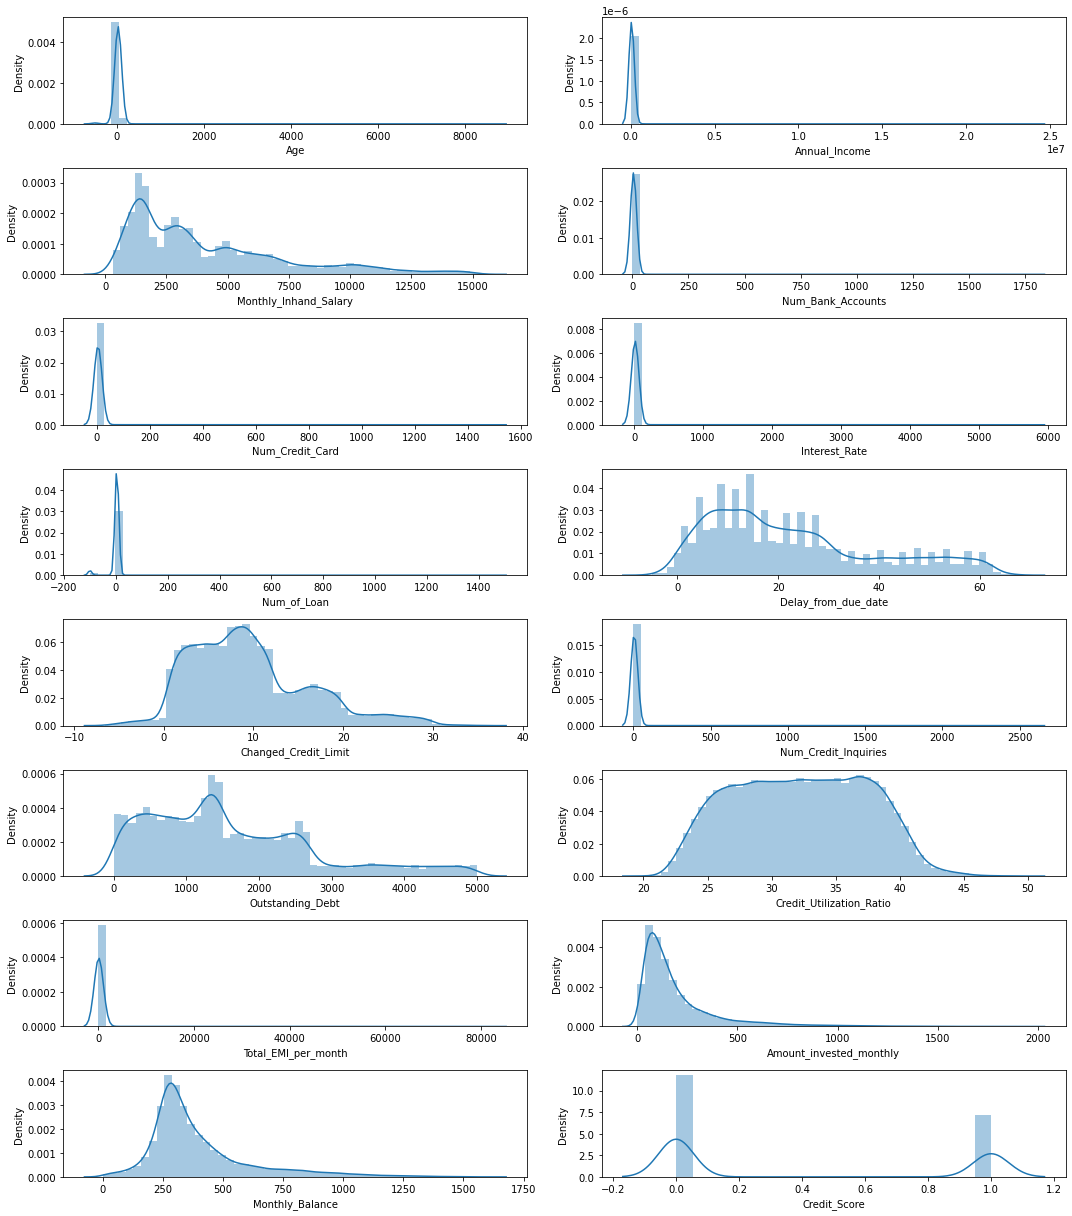

In [68]:
t=1
plt.figure(figsize=(15,17))
for i in num_col:
    plt.subplot(8,2,t)
    sns.distplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,46826.0,110.992355,6.909257e+02,-500.000000,24.000000,33.000000,42.000000,8.697000e+03
Annual_Income,46826.0,166384.732506,1.384518e+06,7005.930000,18811.580000,37755.920000,70910.565000,2.419806e+07
Monthly_Inhand_Salary,39711.0,4139.583539,3.240953e+03,319.556250,1567.845833,3086.756667,5802.140000,1.520463e+04
Num_Bank_Accounts,46826.0,17.338295,1.188170e+02,-1.000000,3.000000,6.000000,8.000000,1.794000e+03
Num_Credit_Card,46826.0,22.922415,1.308679e+02,0.000000,4.000000,6.000000,7.000000,1.499000e+03
Interest_Rate,46826.0,75.344680,4.729898e+02,1.000000,7.000000,15.000000,24.000000,5.788000e+03
Num_of_Loan,46826.0,3.068872,6.155831e+01,-100.000000,2.000000,3.000000,6.000000,1.485000e+03
Delay_from_due_date,46826.0,22.566822,1.660716e+01,-5.000000,10.000000,18.000000,31.000000,6.700000e+01
Changed_Credit_Limit,45826.0,9.546816,6.687057e+00,-6.490000,4.550000,8.520000,13.080000,3.582000e+01
Num_Credit_Inquiries,45924.0,28.391473,1.941717e+02,0.000000,3.000000,6.000000,10.000000,2.592000e+03


### insights from univariate analysis

* outliers in age column
* huge outliers in annual income but justifiable
* outliers in num_bank_account,num_credit_card
* outliers in interest rate
* num_of loan has outliers
* delay from due date majority data between 10 to 20
* changed credit limit between 0 to 10
* num_credit_inquires have outliers
* credit_utilization_ratio have uniform distribution
* high values in total_emi_per_month


In [70]:
cat_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [71]:
for i in cat_col:
    print(data[i].value_counts())

0x1602     1
0x19ad9    1
0x19ae5    1
0x19ae6    1
0x19ae7    1
          ..
0xd868     1
0xd869     1
0xd86a     1
0xd86b     1
0x25fed    1
Name: ID, Length: 46826, dtype: int64
CUS_0x663b    8
CUS_0x535a    8
CUS_0x260b    8
CUS_0xad31    8
CUS_0x6080    8
             ..
CUS_0x5f43    1
CUS_0x2847    1
CUS_0xcb9     1
CUS_0xabd     1
CUS_0xb490    1
Name: Customer_ID, Length: 8692, dtype: int64
June        6090
April       6027
July        6025
May         6022
August      6015
January     5557
February    5555
March       5535
Name: Month, dtype: int64
Stevex                    32
Davidc                    32
Valetkevitchv             29
env                       27
Alexei Oreskovics         26
                          ..
Herbste                    1
Caroline Valetkevitchn     1
Poornimat                  1
Bavierq                    1
le Poornimaf               1
Name: Name, Length: 7445, dtype: int64
685818221    8
439990001    8
092210873    8
306301135    8
472467482    8
  

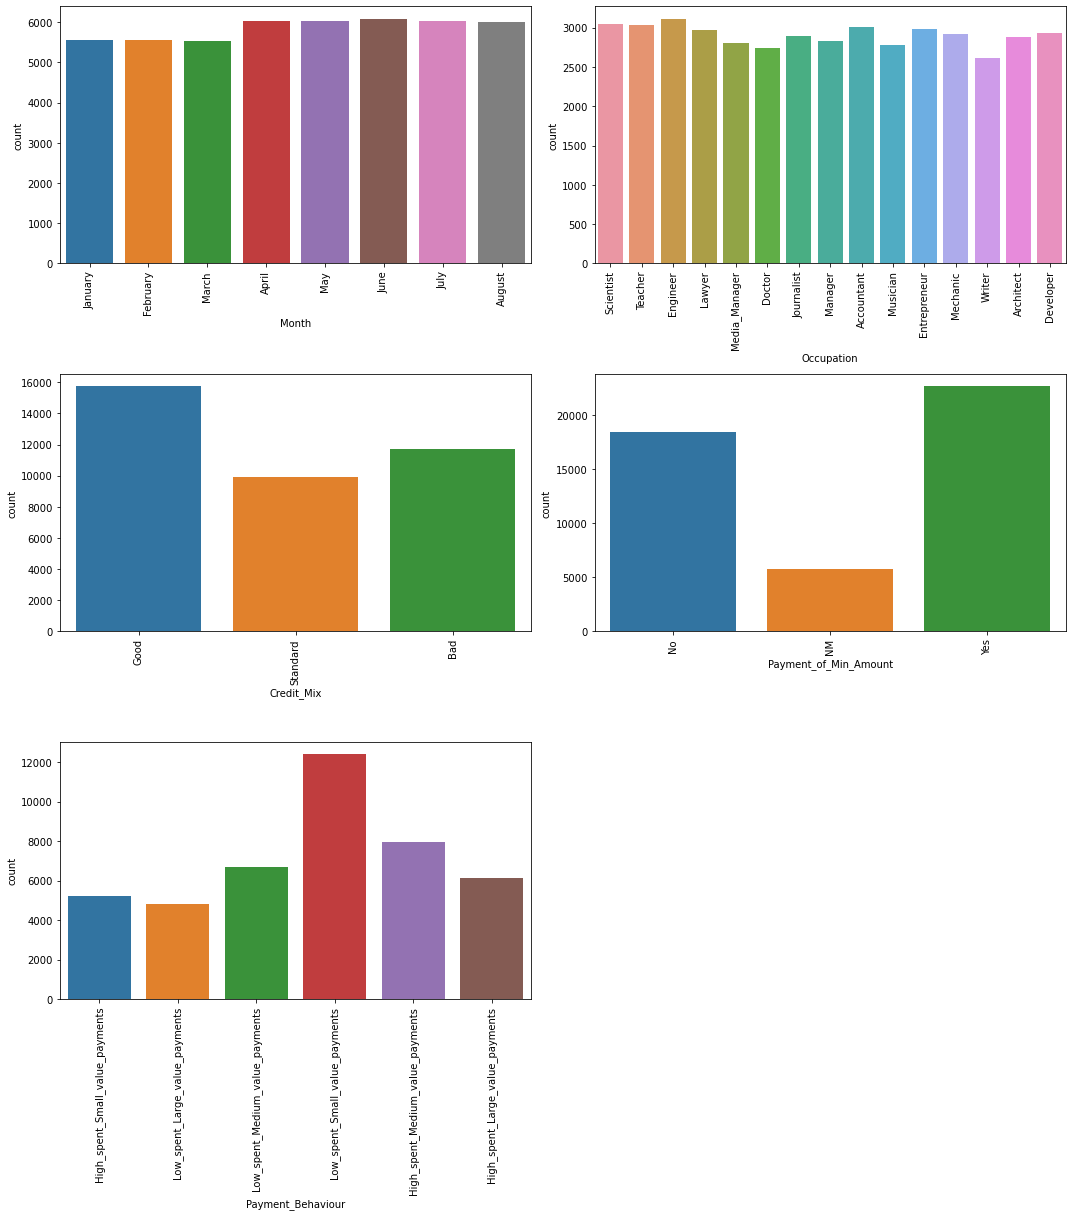

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [72]:
l1=[ 'Month', 'Occupation', 'Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']
t=1
plt.figure(figsize=(15,17))
for i in l1:
    plt.subplot(3,2,t)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    t=t+1
plt.tight_layout()
plt.show()


data.loc[data.Payment_of_Min_Amount=='']

In [73]:
data.loc[data.Payment_of_Min_Amount=='NM','Payment_of_Min_Amount']=np.NaN

## Bivariate Analysis

In [74]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


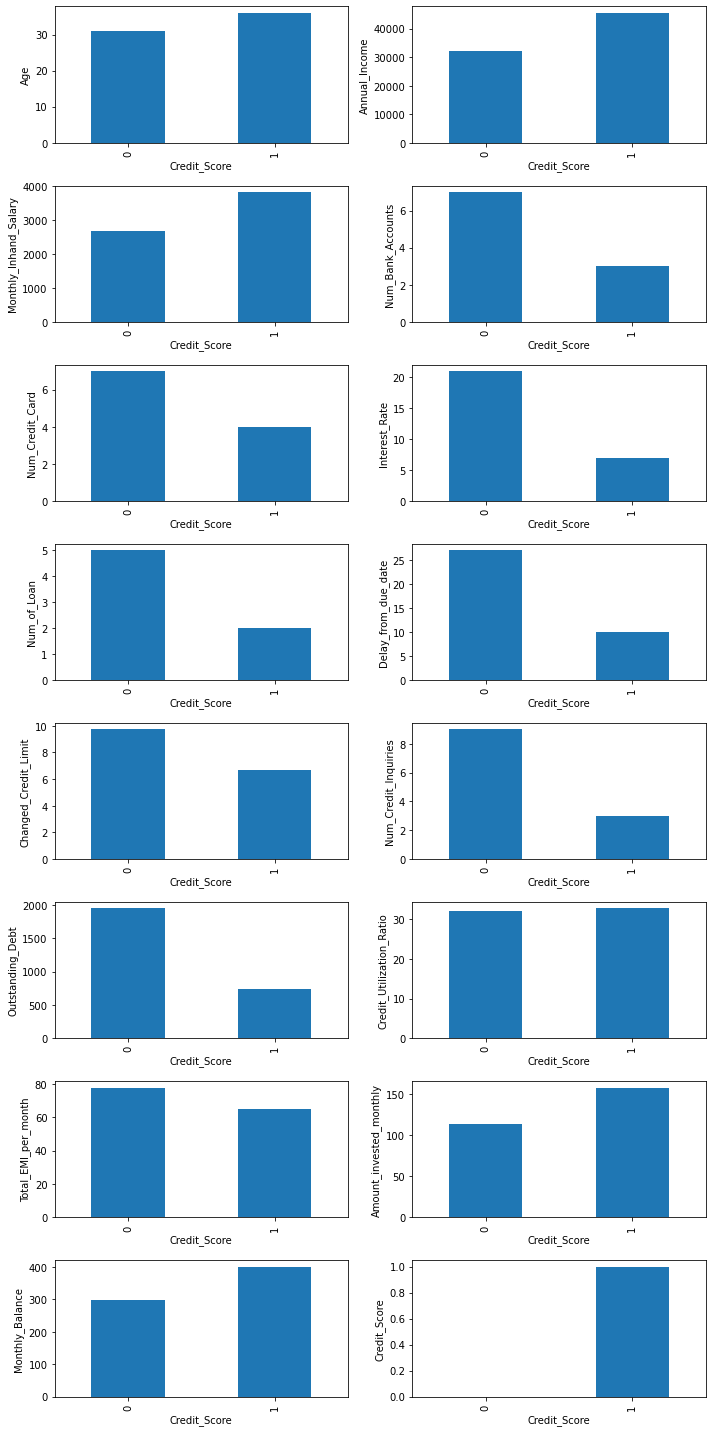

In [75]:
t=1
plt.figure(figsize=(10,20))
for i in num_col:
    plt.subplot(8,2,t)
    data.groupby('Credit_Score')[i].median().plot(kind='bar')
    plt.ylabel(i)
    t=t+1
plt.tight_layout()
plt.show()


#data.groupby('Credit_Score')['Age'].median().plot(kind='bar')

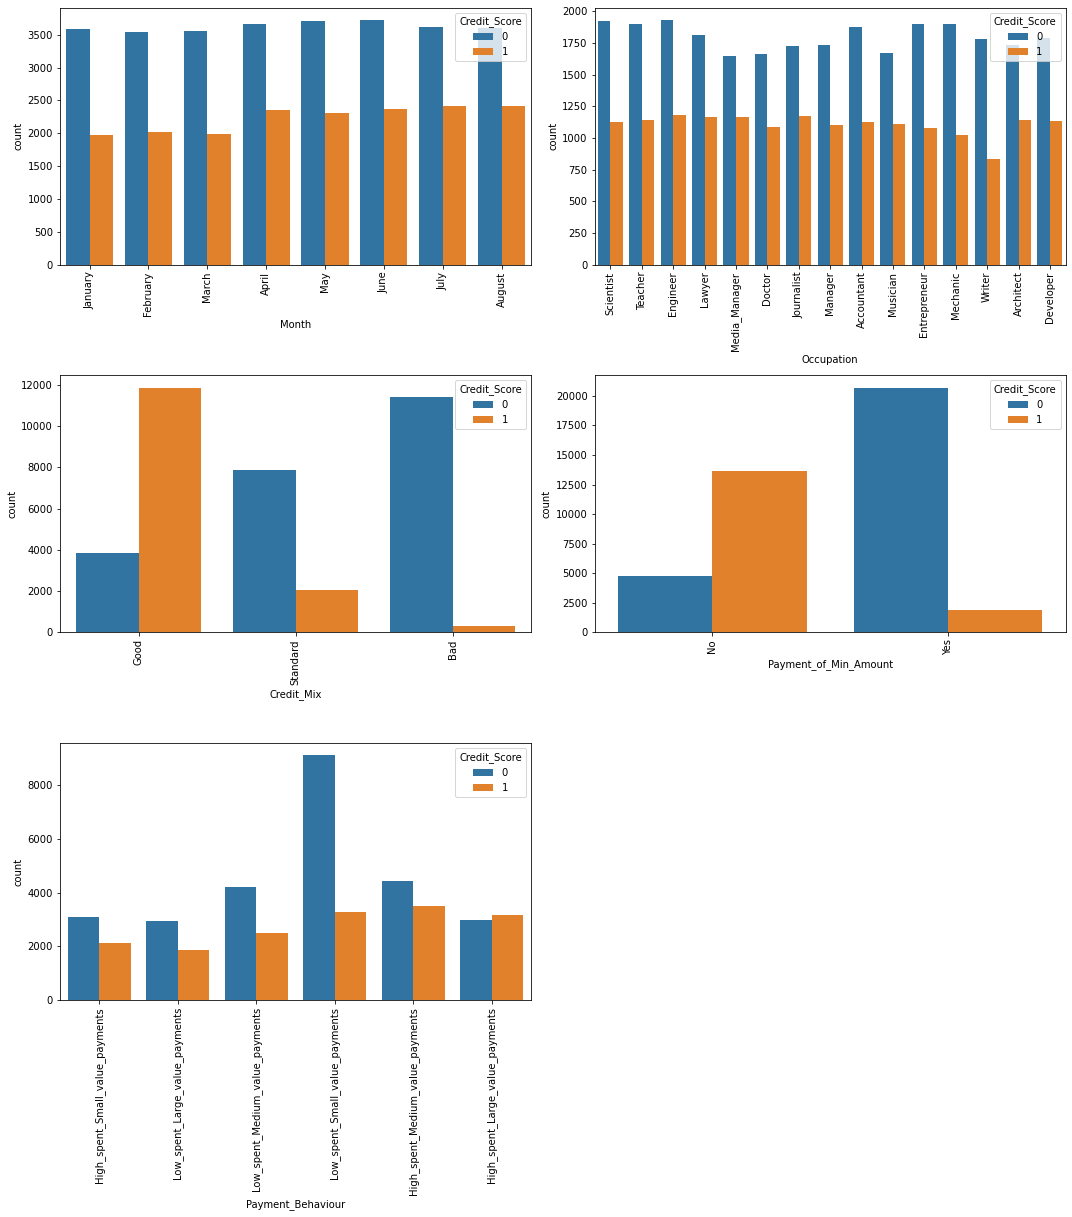

In [76]:
l1=[ 'Month', 'Occupation', 'Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']
t=1
plt.figure(figsize=(15,17))
for i in l1:
    plt.subplot(3,2,t)
    sns.countplot(data[i],hue=data.Credit_Score)
    plt.xticks(rotation=90)
    t=t+1
plt.tight_layout()
plt.show()

## Missing Value Treatment

In [77]:
def funcx(df,col):
    df.loc[df[col].isnull(),col]=df.loc[df[col].isnull(),'Customer_ID'].map(df.groupby('Customer_ID')[col].agg(pd.Series.min))

In [78]:
def func_mode(df,col):
    df.loc[df[col].isnull(),col]=df.loc[df[col].isnull(),'Customer_ID'].map(df.groupby('Customer_ID')[col].agg(pd.Series.mode))

### Name

In [79]:
df1=data.copy()

In [80]:
missing=df1.isnull().sum()
missing

ID                             0
Customer_ID                    0
Month                          0
Name                        4684
Age                            0
SSN                         2606
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [81]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [82]:
df1.groupby('Customer_ID')['Name'].agg(pd.Series.mode)

Customer_ID
CUS_0x1000      Alistair Barrf
CUS_0x100b            Shirboni
CUS_0x1015             Holtono
CUS_0x1018         Felsenthalq
CUS_0x102d    Neil Chatterjeex
                    ...       
CUS_0xfea               Ethanj
CUS_0xff3          Somervilled
CUS_0xff6             Shieldsb
CUS_0xffc                Brads
CUS_0xffd             Damouniq
Name: Name, Length: 8692, dtype: object

In [83]:
df1['Name']=df1['Customer_ID'].map(df1.groupby('Customer_ID')['Name'].agg(pd.Series.mode))

In [84]:
df1.loc[df1.Name.str.len()==0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1427,0x27d9,CUS_0x8b96,August,[],20,342469453,Doctor,82454.000,NaN,6,7,16,6,"Home Equity Loan, Mortgage Loan, Mortgage Loan...",53,15,24.94,11.0,Bad,3085.36,34.328802,4 Years and 6 Months,Yes,234.703339,274.216998,Low_spent_Medium_value_payments,473.496329,0
1984,0x2ed4,CUS_0x5ce6,July,[],27,206715245,Lawyer,25198.190,NaN,3,6,19,3,"Personal Loan, Debt Consolidation Loan, and Mo...",29,9,5.83,7.0,NaN,1261.93,39.226740,17 Years and 4 Months,Yes,7223.000000,81.271775,Low_spent_Small_value_payments,394.875924,0
1985,0x2ed5,CUS_0x5ce6,August,[],27,206715245,Lawyer,25198.190,2347.849167,3,6,19,3,"Personal Loan, Debt Consolidation Loan, and Mo...",29,9,5.83,7.0,Standard,1261.93,39.018013,17 Years and 5 Months,Yes,48.637218,68.803447,Low_spent_Medium_value_payments,397.344252,0
2803,0x37e0,CUS_0x1e17,July,[],21,912224304,Media_Manager,15399.520,1438.293333,4,3,18,1,Auto Loan,25,17,25.03,2.0,Standard,556.93,31.461650,28 Years and 4 Months,Yes,11.418615,69.919478,NaN,332.491240,1
3800,0x4431,CUS_0x4f7d,April,[],37,154660698,Journalist,15590.680,1298.223333,7,9,3225,9,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,16,28.98,7.0,Bad,4746.44,31.476680,13 Years and 8 Months,Yes,92.889365,43.323279,High_spent_Medium_value_payments,243.609690,1
3801,0x4433,CUS_0x4f7d,June,[],37,154660698,Journalist,15590.680,1298.223333,7,9,26,9,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,15,28.98,7.0,Bad,4746.44,33.943242,13 Years and 10 Months,Yes,92.889365,31.789065,High_spent_Large_value_payments,245.143904,1
4340,0x4a94,CUS_0x7fb2,July,[],39,402370700,Architect,13050.620,NaN,7,7,20,2,"Personal Loan, and Student Loan",17,22,19.98,3.0,Standard,1005.81,25.839274,19 Years and 8 Months,Yes,11.092094,41.346526,Low_spent_Small_value_payments,346.616546,1
4341,0x4a95,CUS_0x7fb2,August,[],39,402370700,NaN,13050.620,1090.551667,7,7,20,2,"Personal Loan, and Student Loan",17,19,19.98,4.0,Standard,1005.81,23.864046,19 Years and 9 Months,NaN,11.092094,NaN,High_spent_Small_value_payments,289.132586,1
8340,0x7d10,CUS_0x17c7,July,[],53,302017301,Engineer,16862.715,1603.226250,8,6,10,2,"Debt Consolidation Loan, and Not Specified",22,21,17.13,5.0,Standard,574.86,32.853299,26 Years and 3 Months,Yes,14.740344,45.693958,High_spent_Medium_value_payments,349.888323,1
8498,0x7f45,CUS_0x67de,August,[],21,451006663,Journalist,32102.600,2958.216667,3,7,10,0,NaN,9,13,11.36,5.0,Standard,1210.25,27.251236,19 Years and 2 Months,Yes,0.000000,249.833836,Low_spent_Small_value_payments,335.987830,0


In [85]:
df1.loc[df1.Customer_ID=='CUS_0x242e']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
42489,0x2298c,CUS_0x242e,July,[],43,056991422,Teacher,19656.51,1672.0425,7,5,5,4,"Personal Loan, Payday Loan, Credit-Builder Loa...",6,17,16.89,11.0,Standard,786.15,38.402912,NaN,Yes,48.68909,63.904419,Low_spent_Small_value_payments,344.610741,0


In [86]:
df1.loc[df1.Name.str.len()==0,'Name']=np.NaN

In [87]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            0
SSN                         2606
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

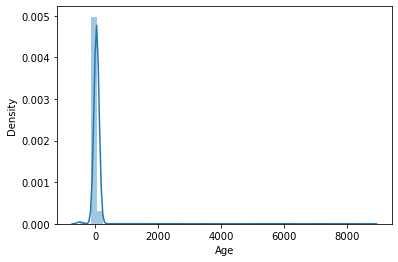

In [88]:
sns.distplot(df1.Age)

In [89]:
q1=df1.Age.quantile(0.25)
q3=df1.Age.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print(ll,ul)

df1.loc[df1.Age>ul,'Age']=np.NaN
df1.loc[df1.Age<ll,'Age']=np.NaN


-3.0 69.0


In [90]:
df1.Age.describe()

count    45499.000000
mean        33.178158
std         10.728815
min         14.000000
25%         24.000000
50%         33.000000
75%         41.000000
max         56.000000
Name: Age, dtype: float64

In [91]:
funcx(df1,'Age')

In [92]:
#df1['Age']=df1['Customer_ID'].map(df1.groupby('Customer_ID')['Age'].agg(pd.Series.median))

In [93]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                         2606
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [94]:
#df1.loc[df1.Age.str.len()==0]

In [95]:
df1.loc[df1.Customer_ID=='CUS_0xa255']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
34732,0x1c728,CUS_0xa255,July,Yamaguchiz,NaN,918145157,Entrepreneur,13309.51,836.125833,3,7,13,4,"Mortgage Loan, Student Loan, Personal Loan, an...",15,19,NaN,4.0,Standard,762.58,29.456791,27 Years and 9 Months,Yes,37.527531,0.000000,High_spent_Large_value_payments,279.281248,1
34733,0x1c729,CUS_0xa255,August,Yamaguchiz,NaN,918145157,Entrepreneur,13309.51,NaN,3,7,13,4,"Mortgage Loan, Student Loan, Personal Loan, an...",17,19,19.56,4.0,NaN,762.58,39.896776,27 Years and 10 Months,Yes,37.527531,46.705335,Low_spent_Medium_value_payments,279.379717,1


In [96]:
#df1.loc[df1.Age.str.len()==0,'Age']=np.NaN

In [97]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                         2606
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [98]:
df1.Age

0        23.0
1        23.0
2        23.0
3        23.0
4        23.0
         ... 
46821    25.0
46822    25.0
46823    25.0
46824    25.0
46825    25.0
Name: Age, Length: 46826, dtype: float64

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      46785 non-null  object 
 4   Age                       46818 non-null  float64
 5   SSN                       44220 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [100]:
df1.loc[df1.Age.isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3629,0x41c2,CUS_0xa329,May,"""Eileen OGrady""s",NaN,683092814,Media_Manager,77936.010,6734.667500,5,6,15,3,"Credit-Builder Loan, Home Equity Loan, and Cre...",6,10,18.20,5.0,Standard,314.62,37.067675,22 Years and 11 Months,Yes,147.102082,84.140342,High_spent_Medium_value_payments,692.224326,0
6383,0x64d5,CUS_0x7a53,August,Barlyna,NaN,229750347,Accountant,8489.190,908.432500,6,10,20,6,"Personal Loan, Student Loan, Credit-Builder Lo...",23,19,25.25,13.0,NaN,3358.60,26.413435,11 Years and 9 Months,Yes,26.426856,83.736385,Low_spent_Medium_value_payments,260.680009,0
6623,0x67c8,CUS_0xc5fe,July,Mutikanir,NaN,957521731,Doctor,10389.575,567.797917,9,10,26,5,"Payday Loan, Not Specified, Personal Loan, Hom...",41,16,26.22,15.0,Bad,3848.30,28.957750,14 Years and 1 Months,Yes,33.492434,12.604306,NaN,260.683051,1
12602,0xb3c5,CUS_0x2b9f,August,Sarah Whitet,NaN,564643020,NaN,141816.360,NaN,3,6,12,0,NaN,0,12,9.20,5.0,NaN,532.62,35.253253,31 Years and 4 Months,No,0.000000,157.203055,High_spent_Large_value_payments,1283.099945,0
25231,0x1500d,CUS_0x74a3,August,Hilaryy,NaN,630807645,Developer,30936.690,2416.057500,4,5,17,1,Auto Loan,10,12,19.18,11.0,Standard,785.88,28.352864,33 Years and 0 Months,Yes,21.485555,NaN,Low_spent_Small_value_payments,207.256040,0
34732,0x1c728,CUS_0xa255,July,Yamaguchiz,NaN,918145157,Entrepreneur,13309.510,836.125833,3,7,13,4,"Mortgage Loan, Student Loan, Personal Loan, an...",15,19,NaN,4.0,Standard,762.58,29.456791,27 Years and 9 Months,Yes,37.527531,0.000000,High_spent_Large_value_payments,279.281248,1
34733,0x1c729,CUS_0xa255,August,Yamaguchiz,NaN,918145157,Entrepreneur,13309.510,NaN,3,7,13,4,"Mortgage Loan, Student Loan, Personal Loan, an...",17,19,19.56,4.0,NaN,762.58,39.896776,27 Years and 10 Months,Yes,37.527531,46.705335,Low_spent_Medium_value_payments,279.379717,1
45471,0x24e10,CUS_0x8d5d,July,Lisa Richwinef,NaN,512582898,Journalist,49965.210,4423.767500,7,6,17,9,"Personal Loan, Payday Loan, Auto Loan, Persona...",52,15,22.75,9.0,NaN,3849.44,31.988462,4 Years and 4 Months,Yes,78783.000000,299.142506,Low_spent_Large_value_payments,94.192377,0


### SSN



In [101]:
# df1.head()
# df1['SSN']=df1['Customer_ID'].map(df1.groupby('Customer_ID')['SSN'].agg(pd.Series.mode))

In [102]:
func_mode(df1,'SSN')

In [103]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                            0
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      46785 non-null  object 
 4   Age                       46818 non-null  float64
 5   SSN                       46826 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  int64  
 5   SSN                       44220 non-null  object 
 6   Occupation                43552 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [106]:
#df1.loc[len(df1.SSN)==0,:]
df1.loc[df1["SSN"].str.len() == 0,'SSN']=np.NaN

In [107]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

### Occupation

In [108]:
func_mode(df1,'Occupation')

In [109]:
#df1['Occupation']=df1['Customer_ID'].map(df1.groupby('Customer_ID')['Occupation'].agg(pd.Series.mode))

In [110]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [111]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [112]:
df1.loc[df1.Occupation.str.len()==0,'Occupation']=np.NaN

In [113]:
df1.loc[df1.Customer_ID=='CUS_0x9593']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41153,0x217ec,CUS_0x9593,July,Shirbonr,15.0,449115861,NaN,35916.15,3195.0125,7,6,11,2,"Home Equity Loan, and Student Loan",20,missing,19.59,12.0,Standard,1426.14,33.431186,10 Years and 3 Months,Yes,14637.0,182.395137,High_spent_Small_value_payments,347.20798,1


In [114]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

### Annual_Income

In [115]:
df2=df1.copy()

In [116]:
df2.Annual_Income.describe()

count    4.682600e+04
mean     1.663847e+05
std      1.384518e+06
min      7.005930e+03
25%      1.881158e+04
50%      3.775592e+04
75%      7.091057e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [117]:
df2[df2.Annual_Income>df2.Annual_Income.quantile(0.75)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
13,0x161a,CUS_0x2dbc,January,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.10,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,NaN,1043.315978,1
14,0x161b,CUS_0x2dbc,February,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.10,3.0,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,1
15,0x161c,CUS_0x2dbc,March,Langep,34.0,486853974,Engineer,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.10,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,1
16,0x161d,CUS_0x2dbc,April,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.10,3.0,NaN,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,1
17,0x161e,CUS_0x2dbc,May,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.10,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46763,0x25f39,CUS_0x3855,August,Xolai,27.0,963557106,Scientist,118677.54,9963.795000,4,4,6,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months,No,237.106366,NaN,High_spent_Medium_value_payments,801.752296,1
46764,0x25f50,CUS_0x89aa,July,Kwokw,38.0,018637005,Manager,85744.12,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",30,18,18.08,5.0,NaN,717.79,34.270048,15 Years and 9 Months,Yes,72.099176,688.029372,Low_spent_Medium_value_payments,232.405785,1
46765,0x25f51,CUS_0x89aa,August,Kwokw,39.0,018637005,Manager,85744.12,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",29,18,18.08,5.0,Standard,717.79,40.554978,15 Years and 10 Months,Yes,72.099176,537.048216,Low_spent_Large_value_payments,373.386941,1
46782,0x25f80,CUS_0x2654,July,enj,38.0,647678889,Media_Manager,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,9,19.39,9.0,Standard,365.66,32.102414,30 Years and 1 Months,Yes,423.731016,378.289477,High_spent_Small_value_payments,635.754174,1


In [118]:
df2.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

<AxesSubplot:xlabel='Annual_Income'>

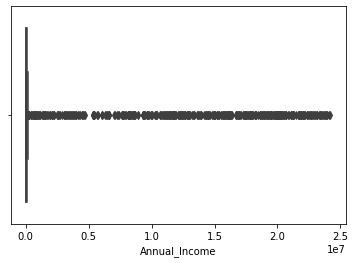

In [119]:
sns.boxplot(df2.Annual_Income)

In [120]:
l=list(df2.Annual_Income)
l

[19114.12,
 19114.12,
 19114.12,
 19114.12,
 19114.12,
 19114.12,
 19114.12,
 34847.84,
 34847.84,
 34847.84,
 34847.84,
 34847.84,
 34847.84,
 143162.64,
 143162.64,
 143162.64,
 143162.64,
 143162.64,
 143162.64,
 73928.46,
 73928.46,
 73928.46,
 73928.46,
 73928.46,
 73928.46,
 73928.46,
 131313.4,
 131313.4,
 131313.4,
 131313.4,
 131313.4,
 10909427.0,
 131313.4,
 34081.38,
 34081.38,
 34081.38,
 34081.38,
 34081.38,
 114838.41,
 114838.41,
 114838.41,
 114838.41,
 114838.41,
 114838.41,
 31370.8,
 31370.8,
 31370.8,
 31370.8,
 31370.8,
 31370.8,
 31370.8,
 31370.8,
 88640.24,
 88640.24,
 88640.24,
 88640.24,
 88640.24,
 8701.545,
 8701.545,
 8701.545,
 8701.545,
 8701.545,
 8701.545,
 8701.545,
 8701.545,
 92047.08,
 92047.08,
 92047.08,
 92047.08,
 92047.08,
 97791.42,
 97791.42,
 97791.42,
 97791.42,
 19300.34,
 19300.34,
 19300.34,
 19300.34,
 19300.34,
 19300.34,
 19514.88,
 19514.88,
 19514.88,
 19514.88,
 19514.88,
 10183.015,
 10183.015,
 10183.015,
 10183.015,
 10183.015,

In [121]:
l1=list(df2.groupby('Customer_ID')['Annual_Income'].agg(pd.Series.mode))
l1

[30625.94,
 113781.38999999998,
 46951.02,
 61194.81,
 89064.52,
 50807.44,
 15989.085,
 129473.16,
 98690.8,
 42387.54,
 35022.22,
 16053.86,
 array([  86617.16, 1105753.  ]),
 34428.21,
 127617.6,
 134035.08,
 24709.33,
 49718.55,
 36982.36,
 12931.56,
 20652.98,
 31641.93,
 130435.86000000002,
 17603.265,
 114432.03,
 16718.645,
 136150.6,
 60830.92,
 49454.13,
 158623.16,
 15968.14,
 9929.235,
 43133.85000000001,
 64933.76,
 28315.95,
 12660.16,
 150131.68,
 39576.59,
 43062.54,
 28952.76,
 117499.47,
 76284.72,
 56301.9,
 70277.22,
 71809.76,
 15264.98,
 14728.21,
 75506.42,
 137798.88,
 46268.4,
 15279.545,
 83358.3,
 37360.94,
 154868.24,
 34476.68,
 7621.8,
 135851.24,
 17975.32,
 107118.96,
 17692.27,
 31316.47,
 7645.095,
 158483.48,
 10060.015,
 76440.52,
 115324.62,
 70779.18,
 176696.88,
 134393.73,
 19867.475,
 18963.65,
 44134.06,
 44295.54,
 14550.52,
 34819.83,
 70099.04,
 14527.455,
 16523.745,
 36817.94,
 87538.24,
 44986.55,
 62835.08,
 14867.69,
 38735.57,
 18829.8

In [122]:
df2.loc[df2.Annual_Income==86617.16]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
37582,0x1eb71,CUS_0x1057,August,David Sheppardv,46.0,741073912,Writer,86617.16,7250.096667,8,4,6,3,"Auto Loan, Student Loan, and Payday Loan",16,21,7.26,4.0,Standard,718.53,35.55554,24 Years and 11 Months,No,141.382055,976.163875,NaN,NaN,1


In [123]:
df2.loc[df2.Customer_ID=='CUS_0x1057','Annual_Income'].min()

86617.16

In [124]:
l1=list(df2.groupby('Customer_ID')['Annual_Income'].agg(pd.Series.min))
l1

[30625.94,
 113781.38999999998,
 46951.02,
 61194.81,
 89064.52,
 50807.44,
 15989.085,
 129473.16,
 98690.8,
 42387.54,
 35022.22,
 16053.86,
 86617.16,
 34428.21,
 127617.6,
 134035.08,
 24709.33,
 49718.55,
 36982.36,
 12931.56,
 20652.98,
 31641.93,
 130435.86000000002,
 17603.265,
 114432.03,
 16718.645,
 136150.6,
 60830.92,
 49454.13,
 158623.16,
 15968.14,
 9929.235,
 43133.85000000001,
 64933.76,
 28315.95,
 12660.16,
 150131.68,
 39576.59,
 43062.54,
 28952.76,
 117499.47,
 76284.72,
 56301.9,
 70277.22,
 71809.76,
 15264.98,
 14728.21,
 75506.42,
 137798.88,
 46268.4,
 15279.545,
 83358.3,
 37360.94,
 154868.24,
 34476.68,
 7621.8,
 135851.24,
 17975.32,
 107118.96,
 17692.27,
 31316.47,
 7645.095,
 158483.48,
 10060.015,
 76440.52,
 115324.62,
 70779.18,
 176696.88,
 134393.73,
 19867.475,
 18963.65,
 44134.06,
 44295.54,
 14550.52,
 34819.83,
 70099.04,
 14527.455,
 16523.745,
 36817.94,
 87538.24,
 44986.55,
 62835.08,
 14867.69,
 38735.57,
 18829.82,
 19506.73,
 29135.38

In [125]:
l2=list(df2.groupby('Customer_ID')['Annual_Income'].agg(pd.Series.mode))
l2

[30625.94,
 113781.38999999998,
 46951.02,
 61194.81,
 89064.52,
 50807.44,
 15989.085,
 129473.16,
 98690.8,
 42387.54,
 35022.22,
 16053.86,
 array([  86617.16, 1105753.  ]),
 34428.21,
 127617.6,
 134035.08,
 24709.33,
 49718.55,
 36982.36,
 12931.56,
 20652.98,
 31641.93,
 130435.86000000002,
 17603.265,
 114432.03,
 16718.645,
 136150.6,
 60830.92,
 49454.13,
 158623.16,
 15968.14,
 9929.235,
 43133.85000000001,
 64933.76,
 28315.95,
 12660.16,
 150131.68,
 39576.59,
 43062.54,
 28952.76,
 117499.47,
 76284.72,
 56301.9,
 70277.22,
 71809.76,
 15264.98,
 14728.21,
 75506.42,
 137798.88,
 46268.4,
 15279.545,
 83358.3,
 37360.94,
 154868.24,
 34476.68,
 7621.8,
 135851.24,
 17975.32,
 107118.96,
 17692.27,
 31316.47,
 7645.095,
 158483.48,
 10060.015,
 76440.52,
 115324.62,
 70779.18,
 176696.88,
 134393.73,
 19867.475,
 18963.65,
 44134.06,
 44295.54,
 14550.52,
 34819.83,
 70099.04,
 14527.455,
 16523.745,
 36817.94,
 87538.24,
 44986.55,
 62835.08,
 14867.69,
 38735.57,
 18829.8

In [126]:
df2['Annual_Income']=df2['Customer_ID'].map(df2.groupby('Customer_ID')['Annual_Income'].agg(pd.Series.min))

In [127]:
df2.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [128]:
funcx(df2,'Annual_Income')

<AxesSubplot:xlabel='Annual_Income'>

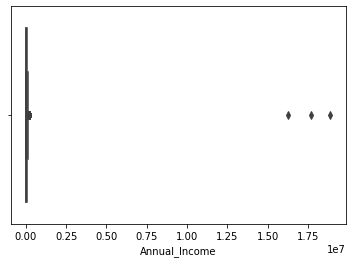

In [129]:
sns.boxplot(df2.Annual_Income)

In [130]:
df2.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      46785 non-null  object 
 4   Age                       46818 non-null  float64
 5   SSN                       46801 non-null  object 
 6   Occupation                46793 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

### Monthly Inhand Salary

In [132]:
df3=df2.copy()

In [133]:
df3.Monthly_Inhand_Salary.isnull().sum()

7115

In [134]:
df3.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

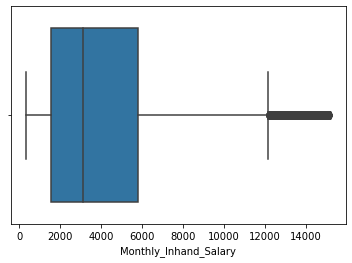

In [135]:
sns.boxplot(df2.Monthly_Inhand_Salary)

In [136]:
funcx(df3,'Monthly_Inhand_Salary')

In [137]:
#df3['Monthly_Inhand_Salary']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Monthly_Inhand_Salary'].agg(pd.Series.min))

In [138]:
df3.Monthly_Inhand_Salary.isnull().sum()

85

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

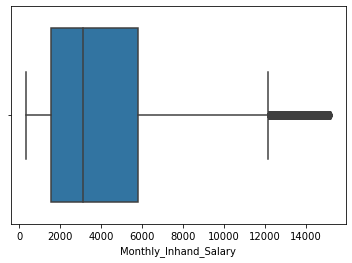

In [139]:
sns.boxplot(df3.Monthly_Inhand_Salary)

### number of bank account

In [140]:
df3.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary         85
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [141]:
df3.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Density'>

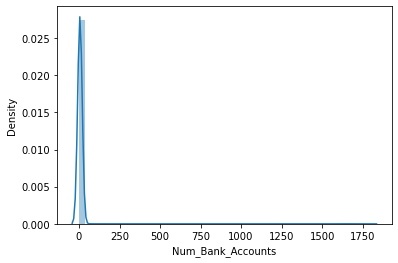

In [142]:
sns.distplot(df3.Num_Bank_Accounts)

<AxesSubplot:xlabel='Num_Bank_Accounts'>

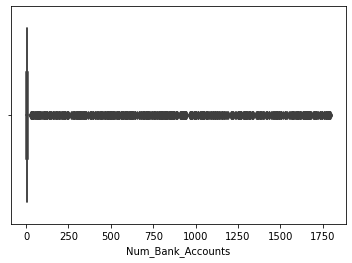

In [143]:
sns.boxplot(df3.Num_Bank_Accounts)

In [144]:
q1=df1.Num_Bank_Accounts.quantile(0.25)
q3=df1.Num_Bank_Accounts.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print(ll,ul)

-4.5 15.5


In [145]:
df3.loc[df3.Num_Bank_Accounts>15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149,0x17d0,CUS_0x42ac,July,Lawrencea,37.0,700603660,Musician,15566.020,1423.168333,67,5,32,4,"Home Equity Loan, Credit-Builder Loan, Persona...",12,17,11.24,9.0,Standard,1693.95,29.706454,8 Years and 4 Months,Yes,43.070520,80.484420,NaN,308.761894,0
162,0x1816,CUS_0xaedb,May,Olivia Oranr,19.0,272471135,Musician,85554.030,7185.502500,1488,2,3,-100,NaN,14,missing,6.43,3.0,NaN,1095.73,41.661802,19 Years and 11 Months,No,0.000000,70.822633,High_spent_Large_value_payments,887.727617,1
371,0x1ab9,CUS_0x7250,August,Doris Frankelj,37.0,651677536,Teacher,85328.730,6858.727500,528,4,11,1,Student Loan,17,834,1.83,2.0,NaN,585.05,22.565448,32 Years and 2 Months,No,68.458966,610.869537,Low_spent_Medium_value_payments,286.544247,1
496,0x1c33,CUS_0x1e9b,February,Taylorb,18.0,866516415,Writer,7441.295,873.107917,1647,8,33,6,"Mortgage Loan, Mortgage Loan, Not Specified, P...",17,16,11.12,10.0,Standard,2569.30,36.050208,5 Years and 8 Months,Yes,25.418743,94.219152,Low_spent_Small_value_payments,257.672896,0
506,0x1c94,CUS_0x6749,March,Subhadip Sircarf,26.0,109190368,Mechanic,77418.520,6450.543333,1696,9,20,7,"Credit-Builder Loan, Auto Loan, Student Loan, ...",34,18,17.05,6.0,Bad,3962.08,31.326327,11 Years and 6 Months,Yes,339.031032,398.466651,Low_spent_Large_value_payments,177.556650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46577,0x25c87,CUS_0xdfd,February,Bullg,40.0,876773604,Teacher,16321.820,1566.151667,1525,10,23,7,"Personal Loan, Personal Loan, Home Equity Loan...",54,23,-0.60,12.0,Bad,2686.37,32.112798,14 Years and 9 Months,Yes,89.423165,68.238366,Low_spent_Small_value_payments,288.953635,0
46640,0x25d6c,CUS_0x1b3b,March,Greg Roumeliotisq,49.0,473628692,Lawyer,76624.480,6123.373333,891,2,8,0,NaN,13,14,2.82,3.0,Good,781.42,37.500417,17 Years and 7 Months,No,0.000000,NaN,Low_spent_Large_value_payments,490.929278,1
46657,0x25d89,CUS_0x544,August,Jon Herskovitzu,29.0,163451172,Mechanic,17013.290,1326.774167,813,1,10,1,Debt Consolidation Loan,6,1,11.93,3.0,NaN,1452.79,28.051684,32 Years and 6 Months,NaN,13.109663,55.726953,Low_spent_Small_value_payments,353.840801,1
46677,0x25dd0,CUS_0x296f,July,David Millikenh,25.0,972130672,Developer,125271.960,10374.330000,1481,7,1,4,"Mortgage Loan, Debt Consolidation Loan, Mortga...",10,10,6.44,7.0,Good,827.56,33.201730,25 Years and 8 Months,NaN,241.065885,180.560015,NaN,855.807100,0


In [146]:
df3.loc[df3.Num_Bank_Accounts>15,'Credit_Score'].value_counts()

0    404
1    228
Name: Credit_Score, dtype: int64

In [147]:
df3.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          41
Age                            8
SSN                           25
Occupation                    33
Annual_Income                  0
Monthly_Inhand_Salary         85
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount       5763
Total_EMI_per_month            0
Amount_invested_monthly     4197
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [148]:
l=list(df3.groupby('Customer_ID')['Num_Bank_Accounts'].agg(pd.Series.min))

In [149]:
pd.Series(l).max()

1731

In [150]:
df3['Num_Bank_Accounts']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Num_Bank_Accounts'].agg(pd.Series.min))

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Density'>

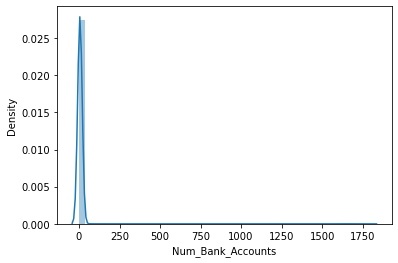

In [151]:
sns.distplot(df2.Num_Bank_Accounts)

<AxesSubplot:xlabel='Num_Bank_Accounts'>

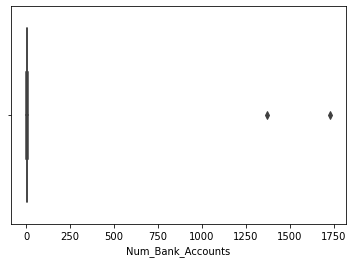

In [152]:
sns.boxplot(df3.Num_Bank_Accounts)

In [153]:
df3.loc[df3.Num_Bank_Accounts>500,'Num_Bank_Accounts']=np.NaN

### Num_Credit_Card 

In [154]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      46785 non-null  object 
 4   Age                       46818 non-null  float64
 5   SSN                       46801 non-null  object 
 6   Occupation                46793 non-null  object 
 7   Annual_Income             46826 non-null  float64
 8   Monthly_Inhand_Salary     46741 non-null  float64
 9   Num_Bank_Accounts         46824 non-null  float64
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  int64  
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Density'>

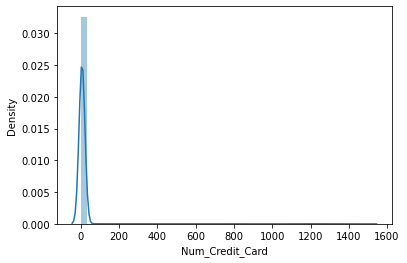

In [155]:
sns.distplot(df3.Num_Credit_Card)

<AxesSubplot:xlabel='Num_Credit_Card'>

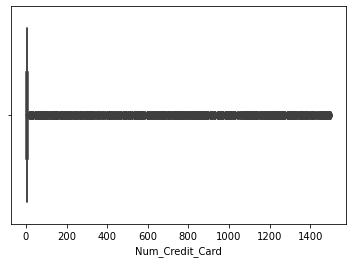

In [156]:
sns.boxplot(df3.Num_Credit_Card)

In [157]:
df3.Num_Credit_Card.describe()

count    46826.000000
mean        22.922415
std        130.867907
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [158]:
df3['Num_Credit_Card']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Num_Credit_Card'].agg(pd.Series.min))

<AxesSubplot:xlabel='Num_Credit_Card'>

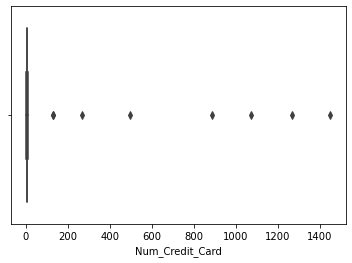

In [159]:
sns.boxplot(df3.Num_Credit_Card)

In [160]:
df3.Num_Credit_Card.describe()

count    46826.000000
mean         5.790885
std         11.482934
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1449.000000
Name: Num_Credit_Card, dtype: float64

In [161]:
df3.loc[df3.Num_Credit_Card>100,'Num_Credit_Card']=np.NaN

<AxesSubplot:xlabel='Num_Credit_Card'>

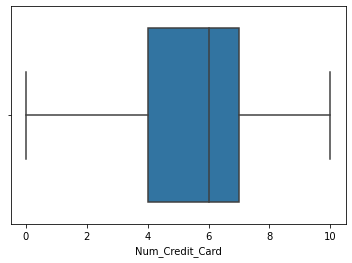

In [162]:
sns.boxplot(df3.Num_Credit_Card)

### Interest_Rate

<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

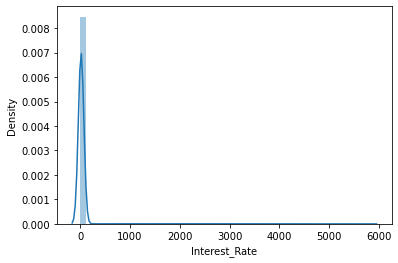

In [163]:
sns.distplot(df3.Interest_Rate)

In [164]:
df3.Interest_Rate.describe()

count    46826.000000
mean        75.344680
std        472.989766
min          1.000000
25%          7.000000
50%         15.000000
75%         24.000000
max       5788.000000
Name: Interest_Rate, dtype: float64

In [165]:
pd.Series(df3.groupby('Customer_ID')['Interest_Rate'].agg(pd.Series.min)).describe()

count    8692.000000
mean       17.689945
std       103.102385
min         1.000000
25%         7.000000
50%        14.000000
75%        22.000000
max      5695.000000
Name: Interest_Rate, dtype: float64

<AxesSubplot:xlabel='Interest_Rate'>

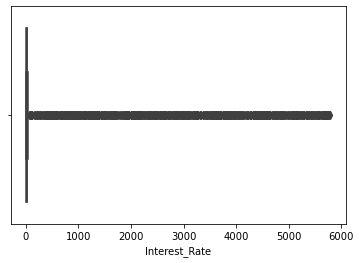

In [166]:
sns.boxplot(df3.Interest_Rate)

In [167]:
df3['Interest_Rate']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Interest_Rate'].agg(pd.Series.min))

<AxesSubplot:xlabel='Interest_Rate'>

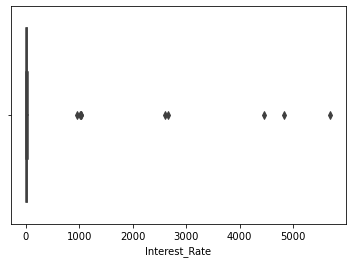

In [168]:
sns.boxplot(df3.Interest_Rate)

In [169]:
df3.loc[df3.Interest_Rate>100,'Interest_Rate']=np.NaN

<AxesSubplot:xlabel='Interest_Rate'>

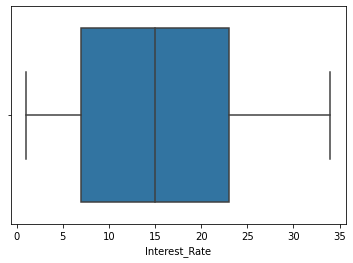

In [170]:
sns.boxplot(df3.Interest_Rate)

### Num_of_Loan

In [171]:
df3.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


<AxesSubplot:xlabel='Num_of_Loan', ylabel='Density'>

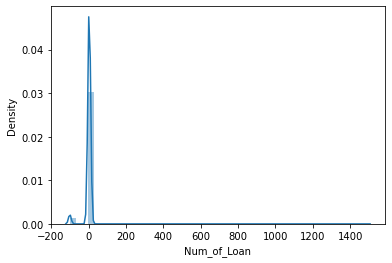

In [172]:
sns.distplot(df3.Num_of_Loan)

<AxesSubplot:xlabel='Num_of_Loan'>

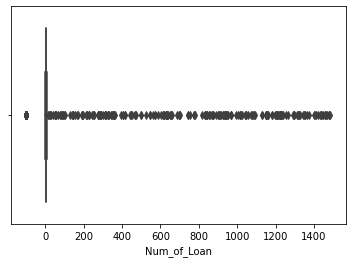

In [173]:
sns.boxplot(df3.Num_of_Loan)

In [174]:
df2.Num_of_Loan.isnull().sum()

0

In [175]:
df3['Num_of_Loan']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Num_of_Loan'].agg(pd.Series.min))

<AxesSubplot:xlabel='Num_of_Loan'>

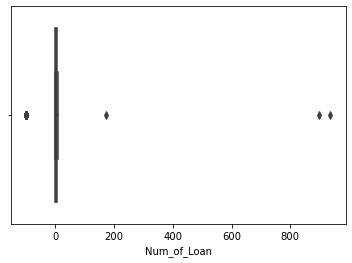

In [176]:
sns.boxplot(df3.Num_of_Loan)

In [177]:
df3.loc[(df3.Num_of_Loan<0)|(df3.Num_of_Loan>100),'Num_of_Loan']=np.NaN

In [178]:
df3.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [179]:
df3.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                 4780
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1000
Num_Credit_Inquiries          902
Credit_Mix                   9491
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4206
Payment_of_Min_Amount        5763
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

### Type_of_Loan

In [180]:
df3.Type_of_Loan

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
46821                          Auto Loan, and Student Loan
46822                          Auto Loan, and Student Loan
46823                          Auto Loan, and Student Loan
46824                          Auto Loan, and Student Loan
46825                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 46826, dtype: object

In [181]:
data.loc[data.Type_of_Loan.isnull(),:]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
19,0x163e,CUS_0x95ee,January,Np,31,612708987,Lawyer,73928.46,NaN,4,1288,8,0,NaN,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.0,98.674410,High_spent_Large_value_payments,740.196090,1
20,0x163f,CUS_0x95ee,February,Np,31,612708987,NaN,73928.46,5988.705000,4,5,8,0,NaN,8,7,10.14,2.0,Good,548.20,42.769864,32 Years and 0 Months,NaN,0.0,172.939214,Low_spent_Medium_value_payments,705.931286,1
21,0x1640,CUS_0x95ee,March,Np,31,612708987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,8,7,10.14,2.0,Good,548.20,40.712187,NaN,No,0.0,150.059734,High_spent_Medium_value_payments,698.810766,1
22,0x1641,CUS_0x95ee,April,Np,31,612708987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,8,7,10.14,2.0,Good,548.20,30.201658,32 Years and 2 Months,No,0.0,618.202391,Low_spent_Small_value_payments,270.668109,1
23,0x1642,CUS_0x95ee,May,Np,31,612708987,Lawyer,73928.46,5988.705000,4,5,5318,0,NaN,11,7,10.14,2.0,NaN,548.20,26.333310,32 Years and 3 Months,No,0.0,177.951836,Low_spent_Large_value_payments,690.918664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46739,0x25ed8,CUS_0x64f0,July,McBrideh,19,655810974,Architect,39977.21,3583.434167,4,7,11,0,NaN,13,10,9.62,4.0,Good,832.09,31.252080,30 Years and 7 Months,No,0.0,23.303191,High_spent_Large_value_payments,575.040225,1
46789,0x25f95,CUS_0xad4f,April,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,3,9,0,NaN,27,19,5.31,2.0,NaN,642.46,26.730863,29 Years and 6 Months,NaN,0.0,205.756074,Low_spent_Small_value_payments,256.450509,0
46790,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,3,9,0,NaN,27,18,5.31,2.0,Standard,642.46,27.699504,NaN,No,0.0,207.473456,Low_spent_Small_value_payments,254.733128,0
46791,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,NaN,Developer,22620.79,1722.065833,6,2,9,0,NaN,27,17,1.31,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.0,16.532189,High_spent_Large_value_payments,395.674395,0


In [182]:
l=list(df3.groupby('Customer_ID')['Type_of_Loan'].agg(pd.Series.mode))
l

['Credit-Builder Loan, and Home Equity Loan',
 array([], dtype=object),
 array([], dtype=object),
 'Credit-Builder Loan, Payday Loan, Home Equity Loan, Not Specified, Student Loan, Home Equity Loan, Personal Loan, and Credit-Builder Loan',
 'Mortgage Loan',
 'Mortgage Loan, Not Specified, Home Equity Loan, and Home Equity Loan',
 'Credit-Builder Loan, Auto Loan, Auto Loan, and Mortgage Loan',
 'Payday Loan, Payday Loan, and Home Equity Loan',
 'Student Loan',
 'Personal Loan, Not Specified, Home Equity Loan, Home Equity Loan, Debt Consolidation Loan, Payday Loan, and Debt Consolidation Loan',
 'Student Loan',
 'Student Loan, Student Loan, Not Specified, Personal Loan, and Debt Consolidation Loan',
 'Auto Loan, Student Loan, and Payday Loan',
 array([], dtype=object),
 'Not Specified, Mortgage Loan, and Payday Loan',
 'Home Equity Loan, and Mortgage Loan',
 'Student Loan, Debt Consolidation Loan, and Personal Loan',
 'Payday Loan, Mortgage Loan, Home Equity Loan, Payday Loan, Auto Loan,

In [183]:
df3.groupby('Customer_ID')['Type_of_Loan'].agg(pd.Series.mode)

Customer_ID
CUS_0x1000            Credit-Builder Loan, and Home Equity Loan
CUS_0x100b                                                   []
CUS_0x1015                                                   []
CUS_0x1018    Credit-Builder Loan, Payday Loan, Home Equity ...
CUS_0x102d                                        Mortgage Loan
                                    ...                        
CUS_0xfea                        Student Loan, and Student Loan
CUS_0xff3           Personal Loan, Mortgage Loan, and Auto Loan
CUS_0xff6                       Home Equity Loan, and Auto Loan
CUS_0xffc     Credit-Builder Loan, Payday Loan, Not Specifie...
CUS_0xffd     Auto Loan, Payday Loan, Payday Loan, Mortgage ...
Name: Type_of_Loan, Length: 8692, dtype: object

In [184]:
#df3['Type_of_Loan']=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Type_of_Loan'].agg(pd.Series.mode))

In [185]:
df3.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                 4780
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1000
Num_Credit_Inquiries          902
Credit_Mix                   9491
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4206
Payment_of_Min_Amount        5763
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

In [186]:
df3.loc[(df3.Type_of_Loan.isnull())&(df3.Num_of_Loan==0),'Type_of_Loan']='no loan'

In [187]:
df3.loc[(df3.Type_of_Loan.isnull())&(df3.Num_of_Loan>=0)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [188]:
df3.loc[(df3.Type_of_Loan.isnull())&(df3.Num_of_Loan.isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
92,0x170a,CUS_0xac86,January,Nickb,19.0,028164402,Entrepreneur,106733.13,8873.427500,4.0,4.0,1.0,NaN,NaN,10,8,0.86,0.0,NaN,76.23,29.815896,32 Years and 9 Months,No,0.000000,388.360354,Low_spent_Large_value_payments,768.982396,1
93,0x170b,CUS_0xac86,February,Nickb,20.0,028164402,Entrepreneur,106733.13,8873.427500,4.0,4.0,1.0,NaN,NaN,5,7,NaN,0.0,NaN,76.23,28.108086,32 Years and 10 Months,No,0.000000,807.206777,Low_spent_Small_value_payments,370.135973,1
94,0x170c,CUS_0xac86,March,Nickb,20.0,028164402,Entrepreneur,106733.13,8873.427500,4.0,4.0,1.0,NaN,NaN,2,6,0.86,0.0,Good,76.23,42.070459,32 Years and 11 Months,No,0.000000,172.032829,High_spent_Large_value_payments,955.309921,1
95,0x170d,CUS_0xac86,April,Nickb,20.0,028164402,Entrepreneur,106733.13,8873.427500,4.0,4.0,1.0,NaN,NaN,5,7,-4.14,0.0,Good,76.23,25.842548,33 Years and 0 Months,No,0.000000,644.287394,Low_spent_Large_value_payments,513.055356,1
96,0x170e,CUS_0xac86,May,Nickb,20.0,028164402,Entrepreneur,106733.13,8873.427500,4.0,4.0,1.0,NaN,NaN,5,6,0.86,0.0,Good,76.23,28.820554,33 Years and 1 Months,No,0.000000,345.609135,High_spent_Medium_value_payments,791.733615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,0x25cc7,CUS_0x3f2d,June,Bertono,32.0,999517557,Writer,126284.31,10718.692500,1.0,5.0,8.0,NaN,NaN,8,2,3.09,6.0,Good,936.59,32.962600,16 Years and 1 Months,No,22102.000000,106.119593,High_spent_Large_value_payments,1205.749657,1
46599,0x25cc8,CUS_0x3f2d,July,Bertono,32.0,999517557,Writer,126284.31,10718.692500,1.0,5.0,8.0,NaN,NaN,8,5,NaN,6.0,Good,936.59,41.966858,16 Years and 2 Months,No,0.000000,422.015208,NaN,919.854042,1
46600,0x25cc9,CUS_0x3f2d,August,Bertono,32.0,999517557,Writer,126284.31,10718.692500,1.0,5.0,8.0,NaN,NaN,11,4,NaN,6.0,Good,936.59,35.006381,16 Years and 3 Months,No,0.000000,378.269752,High_spent_Medium_value_payments,943.599498,1
46669,0x25dc4,CUS_0x738b,July,Leahh,25.0,769441950,Accountant,123828.52,9317.324054,4.0,6.0,17.0,NaN,NaN,25,9,7.33,7.0,Standard,1288.43,39.099750,32 Years and 7 Months,NaN,999.719279,NaN,Low_spent_Medium_value_payments,530.878992,1


In [189]:
df3.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                  930
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1000
Num_Credit_Inquiries          902
Credit_Mix                   9491
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4206
Payment_of_Min_Amount        5763
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

### Delay_from_due_date

In [190]:
df3.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,missing,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,missing,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [191]:
df3.Delay_from_due_date.describe()

count    46826.000000
mean        22.566822
std         16.607156
min         -5.000000
25%         10.000000
50%         18.000000
75%         31.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

### Num_of_Delayed_Payment

In [192]:
df3.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                  930
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1000
Num_Credit_Inquiries          902
Credit_Mix                   9491
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4206
Payment_of_Min_Amount        5763
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

In [193]:
df3.Num_of_Delayed_Payment.describe()

count       46826
unique        349
top       missing
freq         3257
Name: Num_of_Delayed_Payment, dtype: object

In [194]:
df3.loc[df3.Num_of_Delayed_Payment=='missing','Num_of_Delayed_Payment']=np.NaN

In [195]:
df3.loc[df3.Num_of_Delayed_Payment.isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.120,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.120,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
43,0x1668,CUS_0x4157,July,Charlie Zhur,24.0,070191622,Doctor,114838.410,9843.867500,2.0,5.0,7.0,NaN,"Personal Loan, Debt Consolidation Loan, and Au...",11,NaN,8.24,8.0,Good,1377.74,31.767516,21 Years and 10 Months,No,226.892792,215.468298,High_spent_Medium_value_payments,792.025660,1
56,0x168d,CUS_0xc0ab,August,Soyoungd,33.0,342902649,Engineer,88640.240,7266.686667,3.0,6.0,1.0,2.0,"Payday Loan, and Payday Loan",-1,NaN,3.51,3.0,Good,950.36,30.870799,26 Years and 0 Months,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,1
59,0x16a0,CUS_0x6c66,March,Sinead Carews,39.0,328336328,Manager,8701.545,519.128750,6.0,5.0,32.0,7.0,"Personal Loan, Payday Loan, Student Loan, Auto...",23,NaN,8.86,6.0,Standard,2602.69,36.475914,9 Years and 1 Months,NaN,36.548197,45.650976,Low_spent_Large_value_payments,239.713702,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46802,0x25fbd,CUS_0x372c,August,Lucia Mutikanik,19.0,340857301,Lawyer,42903.790,3468.315833,0.0,4.0,6.0,1.0,Not Specified,9,NaN,5.10,1.0,Good,1079.48,35.716618,28 Years and 8 Months,No,34.975457,115.184984,High_spent_Medium_value_payments,446.671142,1
46806,0x25fc5,CUS_0xf16,April,Maria Sheahanb,45.0,868702218,Media_Manager,16680.350,1528.029167,1.0,1.0,5.0,NaN,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,5.69,8.0,Good,897.16,36.132095,21 Years and 4 Months,No,41.113561,199.988581,Low_spent_Small_value_payments,201.700775,1
46807,0x25fc7,CUS_0xf16,June,Maria Sheahanb,45.0,868702218,Media_Manager,16680.350,1528.029167,1.0,1.0,5.0,NaN,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,0.69,8.0,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,NaN,Low_spent_Small_value_payments,233.301539,1
46808,0x25fc8,CUS_0xf16,July,Maria Sheahanb,45.0,868702218,Media_Manager,16680.350,1528.029167,1.0,1.0,5.0,NaN,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,11.69,8.0,NaN,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,340.684834,1


In [196]:
df3.groupby('Customer_ID')['Num_of_Delayed_Payment'].agg(pd.Series.min)

Customer_ID
CUS_0x1000    23.0
CUS_0x100b     7.0
CUS_0x1015     9.0
CUS_0x1018    20.0
CUS_0x102d     5.0
              ... 
CUS_0xfea      0.0
CUS_0xff3      9.0
CUS_0xff6      7.0
CUS_0xffc     14.0
CUS_0xffd     11.0
Name: Num_of_Delayed_Payment, Length: 8692, dtype: float64

In [197]:
#funcx(df3,'Num_of_Delayed_Payment')

In [198]:
df3.Num_of_Delayed_Payment=df3['Customer_ID'].map(df3.groupby('Customer_ID')['Num_of_Delayed_Payment'].agg(pd.Series.min))

In [199]:
df3.Num_of_Delayed_Payment.describe()

count    46793.000000
mean        11.854957
std         28.689397
min         -3.000000
25%          6.000000
50%         12.000000
75%         17.000000
max       4042.000000
Name: Num_of_Delayed_Payment, dtype: float64

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

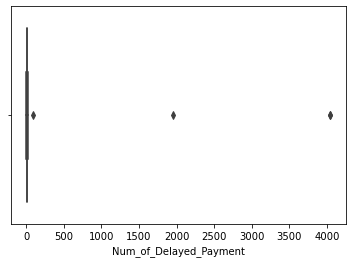

In [200]:
sns.boxplot(df3.Num_of_Delayed_Payment)

In [201]:
df3.loc[df3.Num_of_Delayed_Payment>50,'Num_of_Delayed_Payment']=np.NaN

In [202]:
df3.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                  930
Delay_from_due_date             0
Num_of_Delayed_Payment         37
Changed_Credit_Limit         1000
Num_Credit_Inquiries          902
Credit_Mix                   9491
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4206
Payment_of_Min_Amount        5763
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

### Changed_Credit_Limit

In [203]:
df4=df3.copy()

In [204]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [205]:
def func_y(df,col):
    print('total missing values',df[col].isnull().sum())
    sns.boxplot(df[col])
    plt.show()
    sns.distplot(df[col])
    plt.show()
    print('statistics \n',df[col].describe())
    

total missing values 1000


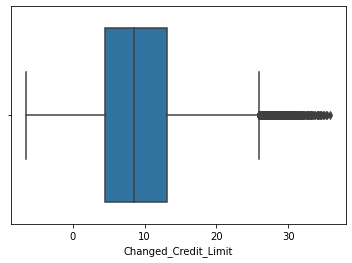

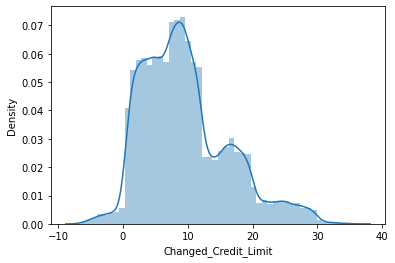

statistics 
 count    45826.000000
mean         9.546816
std          6.687057
min         -6.490000
25%          4.550000
50%          8.520000
75%         13.080000
max         35.820000
Name: Changed_Credit_Limit, dtype: float64


In [206]:
func_y(df4,'Changed_Credit_Limit')

In [207]:
funcx(df4,'Changed_Credit_Limit')

total missing values 6


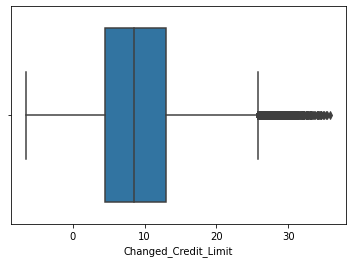

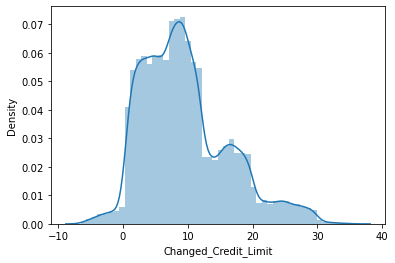

statistics 
 count    46820.000000
mean         9.509165
std          6.695131
min         -6.490000
25%          4.530000
50%          8.480000
75%         13.010000
max         35.820000
Name: Changed_Credit_Limit, dtype: float64


In [208]:
func_y(df4,'Changed_Credit_Limit')

### Num_Credit_Inquiries

In [209]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


total missing values 902


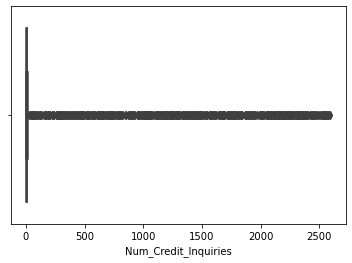

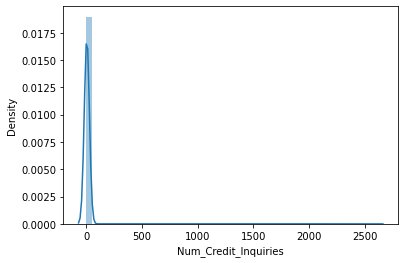

statistics 
 count    45924.000000
mean        28.391473
std        194.171683
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max       2592.000000
Name: Num_Credit_Inquiries, dtype: float64


In [210]:
func_y(df4,'Num_Credit_Inquiries')

In [211]:
df4.loc[df4.Num_Credit_Inquiries>100,['Customer_ID','Num_Credit_Inquiries']]
df4.loc[df4.Customer_ID=='CUS_0xa16e']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
85,0x16fe,CUS_0xa16e,January,Lee Chyenz,41.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18.0,8.97,6.0,Bad,1672.43,25.951273,10 Years and 1 Months,Yes,37.588073,14.622739,High_spent_Large_value_payments,295.247646,0
86,0x16ff,CUS_0xa16e,February,Lee Chyenz,41.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18.0,7.97,6.0,Bad,1672.43,32.385598,10 Years and 2 Months,NaN,37.588073,92.361950,Low_spent_Small_value_payments,267.508435,0
87,0x1700,CUS_0xa16e,March,Lee Chyenz,41.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18.0,7.97,6.0,Bad,1672.43,23.731348,10 Years and 3 Months,Yes,37.588073,91.883972,Low_spent_Small_value_payments,267.986414,0
88,0x1702,CUS_0xa16e,May,Lee Chyenz,41.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",51,18.0,7.97,6.0,Bad,1672.43,32.293490,10 Years and 5 Months,Yes,37.588073,65.831262,NaN,294.039124,0
89,0x1703,CUS_0xa16e,June,Lee Chyenz,42.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18.0,10.97,1050.0,Bad,1672.43,25.105403,10 Years and 6 Months,Yes,37.588073,73.899861,Low_spent_Small_value_payments,285.970524,0
90,0x1704,CUS_0xa16e,July,Lee Chyenz,42.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",52,18.0,7.97,6.0,NaN,1672.43,24.713824,10 Years and 7 Months,Yes,37.588073,61.863728,Low_spent_Small_value_payments,298.006658,0
91,0x1705,CUS_0xa16e,August,Lee Chyenz,42.0,905507912,Media_Manager,10183.015,1074.584583,7.0,5.0,17.0,5.0,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,18.0,7.97,6.0,Bad,1672.43,36.837029,10 Years and 8 Months,Yes,37.588073,71.122747,Low_spent_Small_value_payments,288.747638,0


In [212]:
df4.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,1
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,1
7,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7,0.0,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,1
8,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,5.42,2.0,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,1
9,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,6.42,2.0,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,1


In [213]:
df4.Num_Credit_Inquiries=df4['Customer_ID'].map(df4.groupby('Customer_ID')['Num_Credit_Inquiries'].agg(pd.Series.min))

total missing values 5


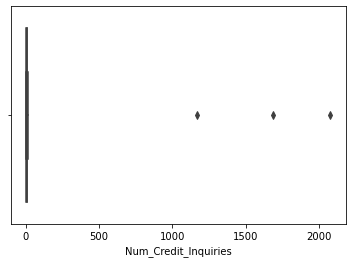

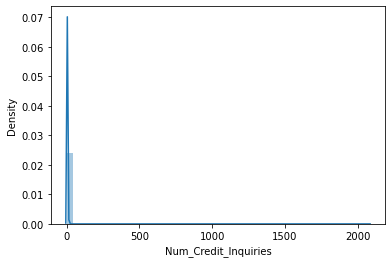

statistics 
 count    46821.000000
mean         5.713312
std         13.987940
min          0.000000
25%          2.000000
50%          6.000000
75%          9.000000
max       2079.000000
Name: Num_Credit_Inquiries, dtype: float64


In [214]:
func_y(df4,'Num_Credit_Inquiries')

In [215]:
df4.loc[df4.Num_Credit_Inquiries>500,'Num_Credit_Inquiries']=np.NaN

### Credit_Mix

In [216]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [217]:
df4.Credit_Mix.value_counts()

Good        15736
Bad         11697
Standard     9902
Name: Credit_Mix, dtype: int64

In [218]:
df4.Credit_Mix.isnull().sum()

9491

In [219]:
l=list(df4.groupby('Customer_ID')['Credit_Mix'].agg(pd.Series.mode))
pd.Series(l).tail()

8687        Good
8688        Good
8689        Good
8690         Bad
8691    Standard
dtype: object

In [220]:
df4.loc[df4.Customer_ID=='CUS_0x1000']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26639,0x1628b,CUS_0x1000,February,Alistair Barrf,17.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",62,23.0,1.63,11.0,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,0
26640,0x1628c,CUS_0x1000,March,Alistair Barrf,17.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",62,23.0,1.63,11.0,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,0
26641,0x1628d,CUS_0x1000,April,Alistair Barrf,17.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",64,23.0,1.63,11.0,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.94109,87.909909,NaN,419.765167,0
26642,0x1628e,CUS_0x1000,May,Alistair Barrf,17.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",67,23.0,2.63,11.0,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,0
26643,0x1628f,CUS_0x1000,June,Alistair Barrf,18.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",62,23.0,1.63,11.0,Bad,1562.91,40.082272,10 Years and 7 Months,Yes,42.94109,114.802401,High_spent_Small_value_payments,372.872676,0
26644,0x16290,CUS_0x1000,July,Alistair Barrf,18.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",62,23.0,2.63,11.0,Bad,1562.91,38.149539,10 Years and 8 Months,Yes,42.94109,266.597160,Low_spent_Small_value_payments,251.077916,0
26645,0x16291,CUS_0x1000,August,Alistair Barrf,18.0,913741218,Lawyer,30625.94,2706.161667,6.0,5.0,27.0,2.0,"Credit-Builder Loan, and Home Equity Loan",57,23.0,1.63,11.0,Bad,1562.91,30.077191,10 Years and 9 Months,Yes,42.94109,77.314276,High_spent_Medium_value_payments,400.360801,0


In [221]:
df4.Credit_Mix=df4.Customer_ID.map(df4.groupby('Customer_ID')['Credit_Mix'].agg(pd.Series.mode))

In [222]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [223]:
df4.loc[df4.Credit_Mix.str.len()==0,'Credit_Mix']=np.NaN

In [224]:
df4.Credit_Mix.isnull().sum()

135

### Outstanding_Debt

In [225]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [226]:
df4.Outstanding_Debt.isnull().sum()

0

total missing values 0


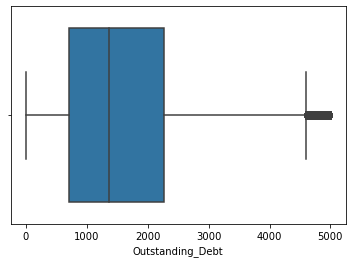

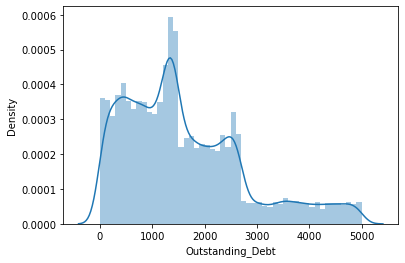

statistics 
 count    46826.000000
mean      1594.057924
std       1157.419610
min          0.230000
25%        704.410000
50%       1361.290000
75%       2259.860000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


In [227]:
func_y(df4,'Outstanding_Debt')

### Credit_Utilization_Ratio

In [228]:
df4.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,1
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,1
7,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7,0.0,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,1
8,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,5.42,2.0,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,1
9,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,6.42,2.0,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,1


total missing values 0


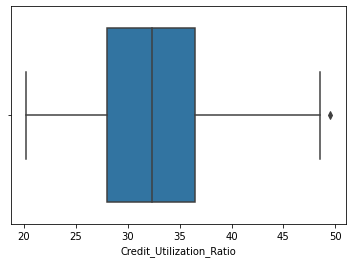

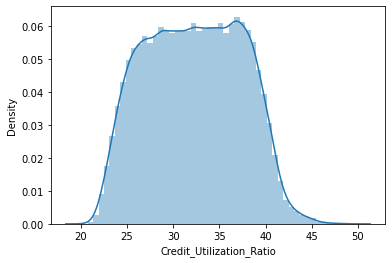

statistics 
 count    46826.000000
mean        32.252641
std          5.125319
min         20.172942
25%         28.020543
50%         32.283409
75%         36.488939
max         49.522324
Name: Credit_Utilization_Ratio, dtype: float64


In [229]:
func_y(df4,'Credit_Utilization_Ratio')

### Credit_History_Age

In [230]:
df4.Credit_History_Age

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
46821     31 Years and 5 Months
46822     31 Years and 6 Months
46823     31 Years and 7 Months
46824     31 Years and 8 Months
46825    31 Years and 10 Months
Name: Credit_History_Age, Length: 46826, dtype: object

In [231]:
df4.loc[df4.Credit_History_Age.isnull(),'Credit_History_Age']='missing'

In [232]:
a='22 Years and 1 Months'
def fun1(a):
    if a!='missing':
        return int(a.split()[0])*12+int(a.split()[3])
    else:
        return np.NaN

In [233]:
df4.Credit_History_Age=df4.Credit_History_Age.apply(fun1)

In [234]:
df4.Credit_History_Age.isnull().sum()

4206

total missing values 4206


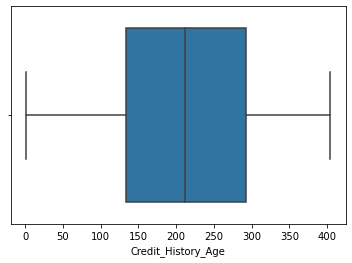

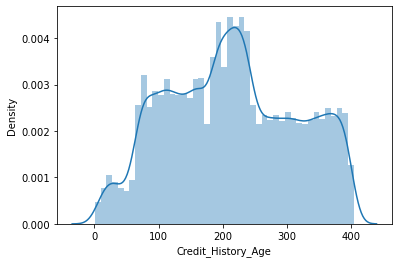

statistics 
 count    42620.000000
mean       213.645120
std         99.554158
min          1.000000
25%        134.000000
50%        211.000000
75%        292.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


In [235]:
func_y(df4,'Credit_History_Age')

In [236]:
funcx(df4,'Credit_History_Age')

total missing values 47


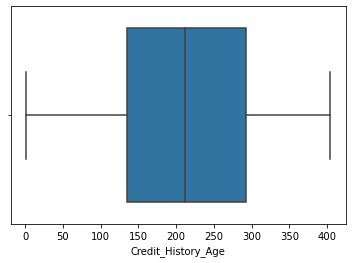

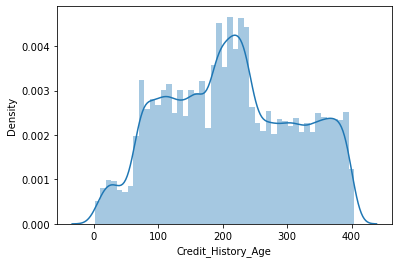

statistics 
 count    46779.000000
mean       213.455033
std         99.483394
min          1.000000
25%        135.000000
50%        211.000000
75%        292.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


In [237]:
func_y(df4,'Credit_History_Age')

### Payment_of_Min_Amount

In [238]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [239]:
df4.Payment_of_Min_Amount.isnull().sum()

5763

In [240]:
df4.Payment_of_Min_Amount.value_counts()

Yes    22620
No     18443
Name: Payment_of_Min_Amount, dtype: int64

In [241]:
df4.Payment_of_Min_Amount=df4.Customer_ID.map(df4.groupby('Customer_ID')['Payment_of_Min_Amount'].agg(pd.Series.mode))

In [242]:
df4.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                  930
Delay_from_due_date             0
Num_of_Delayed_Payment         37
Changed_Credit_Limit            6
Num_Credit_Inquiries            8
Credit_Mix                    135
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age             47
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4197
Payment_Behaviour            3608
Monthly_Balance               597
Credit_Score                    0
dtype: int64

In [243]:
df4.loc[df4.Credit_Mix.str.len()==0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### Total_EMI_per_month

In [244]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [245]:
df4.Total_EMI_per_month.isnull().sum()

0

total missing values 0


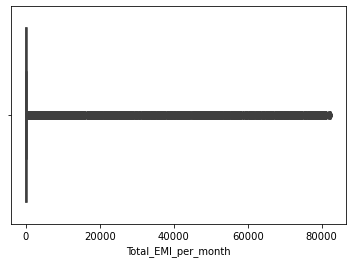

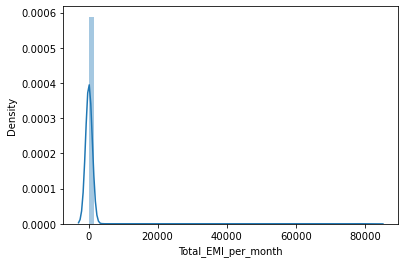

statistics 
 count    46826.000000
mean      1407.055823
std       8291.481867
min          0.000000
25%         33.366757
50%         73.606419
75%        169.542099
max      82331.000000
Name: Total_EMI_per_month, dtype: float64


In [246]:
func_y(df4,'Total_EMI_per_month')

In [247]:
l=list(df4.groupby('Customer_ID')['Total_EMI_per_month'].agg(pd.Series.min))
l

[42.941090422469365,
 0.0,
 0.0,
 225.3686913764476,
 37.57275058079424,
 88.75991924748364,
 33.797020629881075,
 255.32790499097848,
 55.004407569291885,
 225.883368970478,
 21.21457645232058,
 44.86029054336601,
 141.3820546343075,
 0.0,
 211.05460599751723,
 143.48373199958996,
 43.3850460671115,
 231.95678064503065,
 454.41955211428353,
 20.579154708485927,
 33.238356239959586,
 60.33629926519114,
 188.18613322151185,
 102.9927716378738,
 0.0,
 50.9619359000891,
 177.65407218247665,
 159.79934699914432,
 73.34635944957465,
 91.03390497961712,
 77.99711821646055,
 18.120966441843297,
 151.28725497549289,
 193.69258208877807,
 30.230996271640148,
 0.0,
 0.0,
 124.31083909356008,
 47.499818741612366,
 155.77998901144184,
 0.0,
 222.95900228494304,
 50.11934808737193,
 149.93410641234473,
 297.91768403000606,
 36.79009671120451,
 41.58565127954797,
 60.903643233171024,
 988.4480913512176,
 103.77805009014692,
 29.035513675543942,
 169.93600478124742,
 93.34174656716053,
 0.0,
 171.175

In [248]:
df4.loc[df4.Customer_ID=='CUS_0x100b']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
713,0x1ef6,CUS_0x100b,January,Shirboni,18.0,238620395,Media_Manager,113781.39,9549.7825,1.0,4.0,1.0,0.0,no loan,14,7.0,11.34,1.0,Good,1030.2,37.998760,183.0,No,0.0,397.241846,Low_spent_Medium_value_payments,837.736404,0
714,0x1ef7,CUS_0x100b,February,Shirboni,18.0,238620395,Media_Manager,113781.39,9549.7825,1.0,4.0,1.0,0.0,no loan,14,7.0,11.34,1.0,Good,1030.2,35.947655,183.0,No,0.0,661.624048,Low_spent_Large_value_payments,563.354202,0
715,0x1ef8,CUS_0x100b,March,Shirboni,18.0,238620395,Media_Manager,113781.39,9549.7825,1.0,4.0,1.0,0.0,no loan,19,7.0,11.34,1.0,Good,1030.2,43.829630,185.0,No,0.0,NaN,High_spent_Large_value_payments,962.567705,0
716,0x1efa,CUS_0x100b,May,Shirboni,19.0,238620395,Media_Manager,113781.39,9549.7825,1.0,4.0,1.0,0.0,no loan,9,7.0,11.34,1.0,Good,1030.2,32.035662,187.0,No,0.0,758.083195,Low_spent_Small_value_payments,486.895055,0
717,0x1efb,CUS_0x100b,June,Shirboni,19.0,238620395,Media_Manager,113781.39,9549.7825,1.0,4.0,1.0,0.0,no loan,14,7.0,11.34,1.0,Good,1030.2,40.136062,188.0,No,0.0,424.003205,Low_spent_Medium_value_payments,810.975045,0


In [249]:
df4.Name.value_counts()

Stevex            35
Davidc            35
Valetkevitchv     33
env               29
Jonathano         29
                  ..
Miedemac           1
illy Cheungd       1
Malathi Nayakw     1
Shalal-Esad        1
Soyoungk           1
Name: Name, Length: 7445, dtype: int64

In [250]:
df4.Total_EMI_per_month=df4.Customer_ID.map(df4.groupby('Customer_ID')['Total_EMI_per_month'].agg(pd.Series.min))

total missing values 0


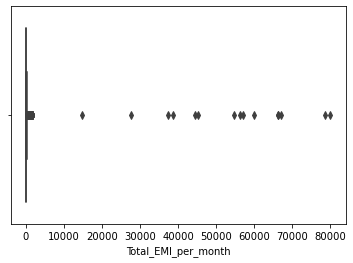

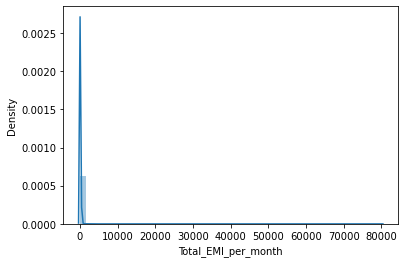

statistics 
 count    46826.000000
mean       122.033506
std       1005.009758
min          0.000000
25%         31.321154
50%         68.072981
75%        147.047371
max      80050.000000
Name: Total_EMI_per_month, dtype: float64


In [251]:
func_y(df4,'Total_EMI_per_month')

In [252]:
df4.loc[df4.Total_EMI_per_month== 80050.0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41922,0x221bf,CUS_0xc1ec,February,Jennifer Ablanj,14.0,089082627,Entrepreneur,40976.22,3473.685,5.0,8.0,5.0,3.0,"Payday Loan, Home Equity Loan, and Student Loan",25,10.0,11.49,6.0,Standard,1332.82,39.708045,207.0,[],80050.0,333.922732,Low_spent_Small_value_payments,224.331128,0


In [253]:
df4.loc[df4.Total_EMI_per_month>df4.Monthly_Inhand_Salary,'Total_EMI_per_month']=np.NaN

total missing values 14


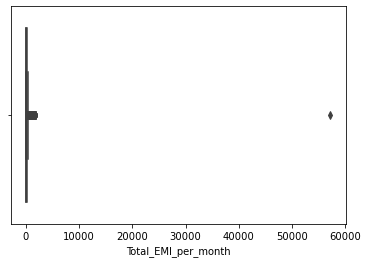

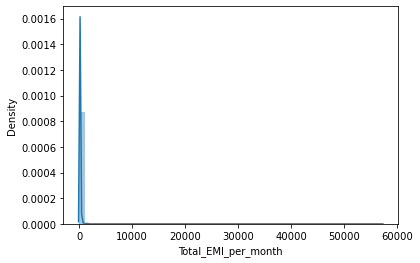

statistics 
 count    46812.000000
mean       106.310646
std        288.033738
min          0.000000
25%         31.296901
50%         68.050685
75%        146.827453
max      57179.000000
Name: Total_EMI_per_month, dtype: float64


In [254]:
func_y(df4,'Total_EMI_per_month')

total missing values 85


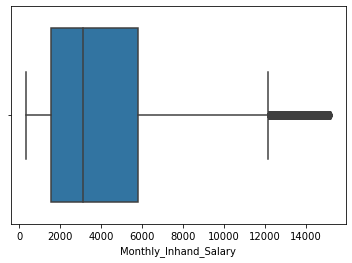

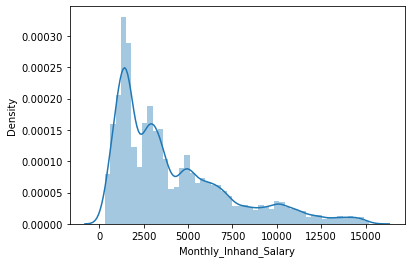

statistics 
 count    46741.000000
mean      4150.182071
std       3250.215342
min        319.556250
25%       1569.123333
50%       3093.153333
75%       5815.796667
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


In [255]:
func_y(df4,'Monthly_Inhand_Salary')

In [256]:
df4.loc[df4.Total_EMI_per_month>50000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
35117,0x1cbdf,CUS_0x2b57,February,Herbst-Baylissi,36.0,NaN,Manager,29337.5,NaN,9.0,7.0,20.0,7.0,"Credit-Builder Loan, Debt Consolidation Loan, ...",25,22.0,-1.59,12.0,NaN,1784.61,36.571255,178.0,Yes,57179.0,144.767186,High_spent_Small_value_payments,183.09848,0


In [257]:
df4.loc[(df4.Monthly_Inhand_Salary.isnull())&(df4.Total_EMI_per_month>1000),'Total_EMI_per_month']=np.NaN

total missing values 15


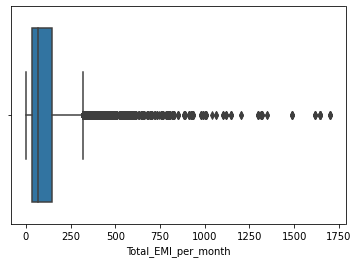

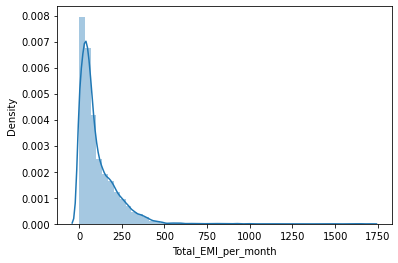

statistics 
 count    46811.000000
mean       105.091430
std        115.664754
min          0.000000
25%         31.296901
50%         68.050685
75%        146.827453
max       1701.955013
Name: Total_EMI_per_month, dtype: float64


In [258]:
func_y(df4,'Total_EMI_per_month')

In [259]:
df4.loc[df4.Total_EMI_per_month>df4.Monthly_Inhand_Salary]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [260]:
df4.loc[df4.Total_EMI_per_month>500]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
70,0x16dd,CUS_0x3553,April,Laurence Frosty,26.0,084253745,Musician,97791.42,7449.469347,6.0,6.0,12.0,0.0,no loan,19,8.0,15.92,1.0,Standard,107.41,26.513631,329.0,Yes,629.815653,499.245020,Low_spent_Medium_value_payments,588.683480,1
71,0x16de,CUS_0x3553,May,Laurence Frosty,26.0,084253745,Musician,97791.42,7449.469347,6.0,6.0,12.0,0.0,no loan,18,8.0,17.92,1.0,Standard,107.41,38.649114,330.0,Yes,629.815653,77.609228,High_spent_Large_value_payments,970.319272,1
72,0x16df,CUS_0x3553,June,Laurence Frosty,26.0,084253745,Musician,97791.42,7449.469347,6.0,6.0,12.0,0.0,no loan,16,8.0,17.92,1.0,Standard,107.41,44.676889,331.0,Yes,629.815653,108.303939,High_spent_Large_value_payments,939.624561,1
73,0x16e1,CUS_0x3553,August,Laurence Frosty,26.0,084253745,Musician,97791.42,7449.469347,6.0,6.0,12.0,0.0,no loan,18,8.0,17.92,1.0,Standard,107.41,33.894443,333.0,Yes,629.815653,110.318204,High_spent_Medium_value_payments,947.610296,1
311,0x19e9,CUS_0x36bb,April,Elinor Comlaye,36.0,837455178,Journalist,134978.24,10541.520750,8.0,5.0,15.0,2.0,"Mortgage Loan, and Mortgage Loan",9,15.0,9.89,3.0,Standard,668.14,31.933756,317.0,Yes,662.777741,NaN,High_spent_Large_value_payments,1103.544143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46285,0x2582f,CUS_0x1130,June,Elizabethr,37.0,846603664,Journalist,137798.88,10609.791909,6.0,5.0,13.0,0.0,no loan,25,12.0,9.25,2.0,Standard,1056.30,34.523299,328.0,No,988.448091,NaN,Low_spent_Medium_value_payments,416.203392,1
46286,0x25830,CUS_0x1130,July,Elizabethr,37.0,846603664,Journalist,137798.88,10609.791909,6.0,5.0,13.0,0.0,no loan,23,12.0,12.25,2.0,Standard,1056.30,39.990533,329.0,No,988.448091,NaN,High_spent_Large_value_payments,1307.770293,1
46287,0x25831,CUS_0x1130,August,Elizabethr,37.0,846603664,Journalist,137798.88,10609.791909,6.0,5.0,13.0,0.0,no loan,23,12.0,9.25,2.0,Standard,1056.30,30.054311,326.0,No,988.448091,1156.953783,Low_spent_Medium_value_payments,282.870217,1
46669,0x25dc4,CUS_0x738b,July,Leahh,25.0,769441950,Accountant,123828.52,9317.324054,4.0,6.0,17.0,NaN,NaN,25,9.0,7.33,7.0,Standard,1288.43,39.099750,391.0,Yes,999.719279,NaN,Low_spent_Medium_value_payments,530.878992,1


### Amount_invested_monthly

total missing values 4197


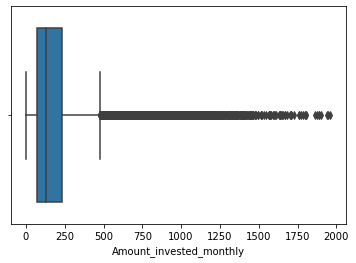

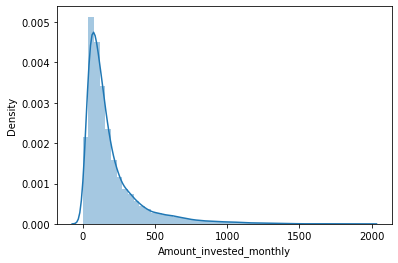

statistics 
 count    42629.000000
mean       196.101819
std        206.035388
min          0.000000
25%         71.406157
50%        127.520930
75%        234.879866
max       1961.218850
Name: Amount_invested_monthly, dtype: float64


In [261]:
func_y(df4,'Amount_invested_monthly')

In [262]:
funcx(df4,'Amount_invested_monthly')

total missing values 51


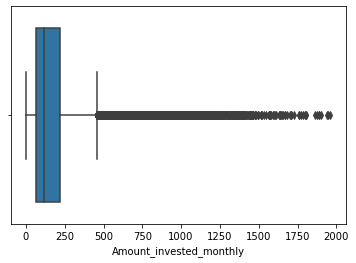

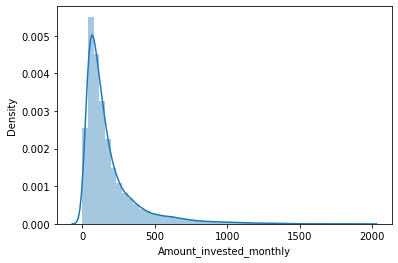

statistics 
 count    46775.000000
mean       186.680251
std        201.639883
min          0.000000
25%         65.906499
50%        119.518599
75%        222.338216
max       1961.218850
Name: Amount_invested_monthly, dtype: float64


In [263]:
func_y(df4,'Amount_invested_monthly')

In [264]:
df4.loc[df4.Amount_invested_monthly>df4.Monthly_Inhand_Salary]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [265]:
df4.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


### Payment_Behaviour

In [266]:
df4.Payment_Behaviour.isnull().sum()

3608

In [267]:
df4.loc[df4.Payment_Behaviour.isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,NaN,340.479212,1
13,0x161a,CUS_0x2dbc,January,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",5,5.0,7.10,3.0,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,NaN,1043.315978,1
25,0x1645,CUS_0x95ee,August,Np,31.0,612708987,Lawyer,73928.46,5988.705000,4.0,5.0,8.0,0.0,no loan,8,7.0,10.14,2.0,Good,548.20,31.580990,390.0,No,0.000000,42.635590,NaN,796.234910,1
31,0x1650,CUS_0x284a,July,Nadiaq,34.0,411510676,Lawyer,131313.40,10469.207759,0.0,1.0,8.0,2.0,"Credit-Builder Loan, and Mortgage Loan",0,2.0,9.34,2.0,Good,352.16,26.947565,373.0,No,137.644605,930.391898,NaN,326.241830,1
41,0x1665,CUS_0x4157,April,Charlie Zhur,23.0,070191622,Doctor,114838.41,9843.867500,2.0,5.0,7.0,NaN,"Personal Loan, Debt Consolidation Loan, and Au...",11,8.0,8.24,3.0,Good,1377.74,30.459032,259.0,No,226.892792,225.082049,NaN,772.411909,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46737,0x25ed6,CUS_0x64f0,May,McBrideh,19.0,655810974,Architect,39977.21,3583.434167,4.0,7.0,11.0,0.0,no loan,13,8.0,3.62,4.0,Good,832.09,41.040949,365.0,No,0.000000,68.788108,NaN,529.555309,1
46746,0x25ef7,CUS_0x8788,February,Sophie Sassardv,24.0,138387150,Musician,71025.40,5766.783333,7.0,6.0,32.0,5.0,"Payday Loan, Credit-Builder Loan, Mortgage Loa...",31,14.0,17.12,6.0,Standard,2542.42,28.091485,170.0,Yes,195.207484,577.058235,NaN,94.412614,0
46762,0x25f38,CUS_0x3855,July,Xolai,27.0,963557106,Scientist,118677.54,9963.795000,4.0,4.0,6.0,NaN,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,36.246273,365.0,No,237.106366,198.762526,NaN,810.510608,1
46815,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,50.0,133167738,Writer,37188.10,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7,9.0,5.38,3.0,Good,620.64,38.850680,363.0,No,84.205949,82.825572,NaN,412.669312,1


In [268]:
func_mode(df4,'Payment_Behaviour')

In [269]:
df4.Payment_Behaviour.isnull().sum()

0

In [270]:
df4.loc[df4.Payment_Behaviour.str.len()==0,'Payment_Behaviour']=np.NaN

In [271]:
df4.Payment_Behaviour.isnull().sum()

41

In [272]:
df4.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           41
Age                             8
SSN                            25
Occupation                     33
Annual_Income                   0
Monthly_Inhand_Salary          85
Num_Bank_Accounts               2
Num_Credit_Card                 8
Interest_Rate                   9
Num_of_Loan                 10151
Type_of_Loan                  930
Delay_from_due_date             0
Num_of_Delayed_Payment         37
Changed_Credit_Limit            6
Num_Credit_Inquiries            8
Credit_Mix                    135
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age             47
Payment_of_Min_Amount           0
Total_EMI_per_month            15
Amount_invested_monthly        51
Payment_Behaviour              41
Monthly_Balance               597
Credit_Score                    0
dtype: int64

### Monthly_Balance

In [273]:
df4.Monthly_Balance

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
46821    410.256158
46822    479.866228
46823    496.651610
46824    516.809083
46825    393.673696
Name: Monthly_Balance, Length: 46826, dtype: float64

total missing values 597


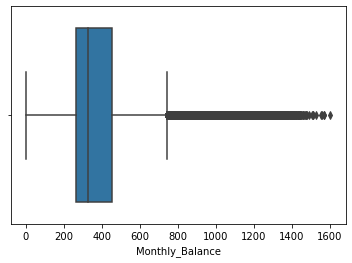

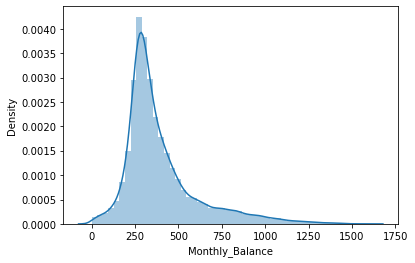

statistics 
 count    46229.000000
mean       395.173405
std        215.527608
min          0.007760
25%        265.910235
50%        328.729067
75%        455.622291
max       1602.040519
Name: Monthly_Balance, dtype: float64


In [274]:
func_y(df4,'Monthly_Balance')

In [275]:
funcx(df4,'Monthly_Balance')

total missing values 10


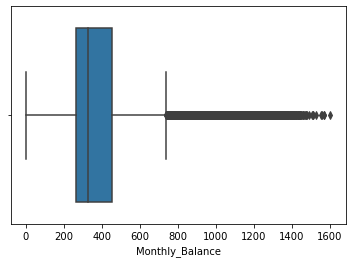

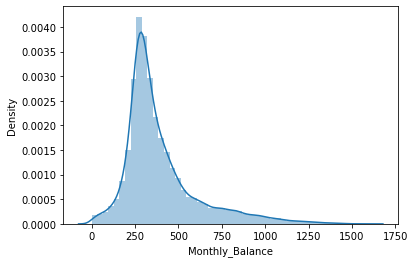

statistics 
 count    46816.000000
mean       393.424147
std        216.206707
min          0.007760
25%        264.651031
50%        327.766832
75%        454.709396
max       1602.040519
Name: Monthly_Balance, dtype: float64


In [276]:
func_y(df4,'Monthly_Balance')

In [277]:
df4.loc[df4.Monthly_Balance>df4.Monthly_Inhand_Salary]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### Rest columns treatment

In [278]:
df4.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,1
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,1
7,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7,0.0,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,1
8,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,5.42,2.0,Good,605.03,39.182656,322.0,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,1
9,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004075839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3,0.0,6.42,2.0,Good,605.03,34.977895,323.0,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,1


In [279]:
df4.Type_of_Loan[0]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [280]:
a='Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
b=a.split(',')
len(b)

4

In [281]:
# for i in df4.Type_of_Loan:
#     b=i.split(',')
#     print(len(b))

In [282]:
df4.loc[df4.Type_of_Loan.isnull(),'Type_of_Loan']='missing'

In [283]:
def func(i):
    if i=='missing':
        return np.NaN
    else:
        b=i.split(',')
        return len(b)

In [284]:
df4.Num_of_Loan=df4.Type_of_Loan.apply(func)

In [285]:
df4.loc[df4.Type_of_Loan=='missing','Type_of_Loan']=np.NaN

In [286]:
df4.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                         41
Age                           8
SSN                          25
Occupation                   33
Annual_Income                 0
Monthly_Inhand_Salary        85
Num_Bank_Accounts             2
Num_Credit_Card               8
Interest_Rate                 9
Num_of_Loan                 930
Type_of_Loan                930
Delay_from_due_date           0
Num_of_Delayed_Payment       37
Changed_Credit_Limit          6
Num_Credit_Inquiries          8
Credit_Mix                  135
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age           47
Payment_of_Min_Amount         0
Total_EMI_per_month          15
Amount_invested_monthly      51
Payment_Behaviour            41
Monthly_Balance              10
Credit_Score                  0
dtype: int64

In [287]:
df4.shape[0]-df4.dropna().shape[0]

1354

In [288]:
df5=df4.dropna()

### new dataset

In [289]:
df5

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,0x25fe8,CUS_0x942c,March,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,Good,502.38,39.323569,377.0,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,0
46822,0x25fe9,CUS_0x942c,April,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23,6.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0
46823,0x25fea,CUS_0x942c,May,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18,6.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0
46824,0x25feb,CUS_0x942c,June,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0


In [290]:
df5.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [291]:
df5.Payment_of_Min_Amount.value_counts()
df5.loc[df5.Payment_of_Min_Amount.str.len()==0,'Payment_of_Min_Amount']=np.NaN

In [292]:
df6=df5.dropna()

In [293]:
type(df6.Payment_Behaviour[46825])

numpy.ndarray

In [294]:
# for i in df6.Payment_Behaviour:
#     if type(i)==np.ndarray:
#         print(i)
#     else:
#         print('nothing')
        
def func8(i):
    if type(i)==np.ndarray:
        return i[0]
    else:
        return i
df6.Payment_Behaviour=df6.Payment_Behaviour.apply(func8)

In [295]:
df6.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      13076
High_spent_Medium_value_payments     8478
Low_spent_Medium_value_payments      6852
High_spent_Large_value_payments      6727
High_spent_Small_value_payments      5370
Low_spent_Large_value_payments       4928
Name: Payment_Behaviour, dtype: int64

### Encoding

In [296]:
df6.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,6.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821000265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1


In [297]:
df6.loc[df6.Customer_ID=='CUS_0x942c']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
46820,0x25fe6,CUS_0x942c,January,Nicks,24.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23,6.0,9.5,3.0,Good,502.38,32.991333,375.0,No,35.104023,401.196481,Low_spent_Small_value_payments,189.641080,0
46821,0x25fe8,CUS_0x942c,March,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20,6.0,9.5,3.0,Good,502.38,39.323569,377.0,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,0
46822,0x25fe9,CUS_0x942c,April,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23,6.0,11.5,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0
46823,0x25fea,CUS_0x942c,May,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18,6.0,11.5,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0
46824,0x25feb,CUS_0x942c,June,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27,6.0,11.5,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0
46825,0x25fed,CUS_0x942c,August,Nicks,25.0,078735990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,167.163865,High_spent_Large_value_payments,393.673696,0


In [298]:
df6.to_csv('sql_file.csv')

In [299]:
l=list(df6.Customer_ID.unique(),)
len(l)

8195

In [300]:
df6=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\credit score classification\archive (10)\unique records 1.csv")

In [301]:
df6

,MyUnknownColumn,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.27,4,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,7,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,0,7.42,2,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,1
2,13,0x161a,CUS_0x2dbc,January,Langep,34,486853974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,5,7.10,3,Good,1303.01,28.616735,213,No,246.992319,168.413703,High_spent_Small_value_payments,1043.315978,1
3,19,0x163e,CUS_0x95ee,January,Np,31,612708987,Lawyer,73928.46,5988.705000,4,5,8,1,no loan,12,7,10.14,2,Good,548.20,39.962685,384,No,0.000000,98.674410,High_spent_Large_value_payments,740.196090,1
4,26,0x164a,CUS_0x284a,January,Nadiaq,33,411510676,Lawyer,131313.40,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,2,Good,352.16,32.200509,367,No,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,46796,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340857301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,-1,4.10,1,Good,1079.48,27.289440,337,No,34.975457,78.514945,High_spent_Small_value_payments,493.341182,1
8191,46803,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,868702218,Media_Manager,16680.35,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",4,0,5.69,4,Good,897.16,39.868572,254,No,41.113561,52.951978,High_spent_Small_value_payments,318.737378,1
8192,46810,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133167738,Writer,37188.10,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,9,5.38,3,Good,620.64,39.080823,357,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,1
8193,46817,0x25fda,CUS_0x8600,January,Sarah McBridec,28,31350942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,25,18.31,9,Bad,3571.70,22.895966,68,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,0


In [302]:
df6.isnull().sum()

MyUnknownColumn             0
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [303]:
df6=df6.dropna()

In [304]:
X=df6.drop(['Credit_Score','ID','SSN','Type_of_Loan','Name','MyUnknownColumn'],axis=1)
y=df6.Credit_Score

In [305]:
! pip install category_encoders
import category_encoders as ce


In [306]:
cat_col=X.select_dtypes(include=np.object).columns

In [307]:
for i in cat_col:
    X.loc[:,i]=ce.TargetEncoder().fit_transform(X[i],y)

In [308]:
X

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.38975,0.345877,23,0.379613,19114.12,1824.843333,3,4,3,4,3,4,11.27,4,0.740272,809.98,26.822620,265,0.719471,49.574949,80.415295,0.398773,312.494089
1,0.38975,0.369231,28,0.387900,34847.84,3037.986667,2,4,6,1,7,0,7.42,2,0.740272,605.03,38.550848,320,0.719471,18.816215,40.391238,0.531078,484.591214
2,0.38975,0.345877,34,0.385813,143162.64,12187.220000,1,5,8,3,5,5,7.10,3,0.740272,1303.01,28.616735,213,0.719471,246.992319,168.413703,0.398773,1043.315978
3,0.38975,0.345877,31,0.396522,73928.46,5988.705000,4,5,8,1,12,7,10.14,2,0.740272,548.20,39.962685,384,0.719471,0.000000,98.674410,0.531078,740.196090
4,0.38975,0.345877,33,0.396522,131313.40,11242.783333,0,1,8,2,0,2,9.34,2,0.740272,352.16,32.200509,367,0.719471,137.644605,378.171254,0.462783,858.462474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,0.38975,0.345877,18,0.396522,42903.79,3468.315833,0,4,6,1,14,-1,4.10,1,0.740272,1079.48,27.289440,337,0.719471,34.975457,78.514945,0.398773,493.341182
8191,0.38975,0.345877,44,0.428571,16680.35,1528.029167,1,1,5,4,4,0,5.69,4,0.740272,897.16,39.868572,254,0.719471,41.113561,52.951978,0.398773,318.737378
8192,0.38975,0.345877,49,0.320565,37188.10,3097.008333,1,4,5,3,7,9,5.38,3,0.740272,620.64,39.080823,357,0.719471,84.205949,223.875018,0.263499,291.619866
8193,0.38975,0.345877,28,0.398182,20002.88,1929.906667,10,8,29,5,35,25,18.31,9,0.042457,3571.70,22.895966,68,0.137255,60.964772,43.370670,0.531078,328.655224


### Machine learning model

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score,accuracy_score,recall_score
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


In [310]:
def evaluation(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print('accuracy',accuracy_score(acc,pred))
    print('recall',recall_score(acc,pred))
    print('auc_score',roc_auc_score(acc,pred))
    print('classification_report \n',classification_report(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [311]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

### 1) Base model- logistic Regression

In [312]:
model=sma.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.359297
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Credit_Score   No. Observations:                 6556
Model:                          Logit   Df Residuals:                     6533
Method:                           MLE   Df Model:                           22
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.4630
Time:                        22:45:24   Log-Likelihood:                -2355.6
converged:                       True   LL-Null:                       -4386.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Customer_ID                -25.8339      2.309    -11.186      0.000     -30.360     -21.308
Month                        8.7284      0.660     13.215      0.000       7.434      10.023
Age                          0.0026      0.003      0.768      0.442      -0.004       0.009
Occupation                   6.9406      1.513      4.586      0.000       3.974       9.907
Annual_Income            -2.172e-07   7.99e-07     -0.272      0.786   -1.78e-06    1.35e-06
Monthly_Inhand_Salary       -0.0002   4.06e-05     -4.544      0.000      -0.000      -0.000
Num_Bank_Accounts            0.0536      0.020      2.687      0.007       0.015       0.093
Num_Credit_Card             -0.3042      0.023    -13.222      0.000      -0.349      -0.259
Interest_Rate               -0.0357      0.008     -4.494      0.000      -0.051      -0.020
Num_of_Loan                 -0.0640      0.033     -1.966      0.049      -0.128      -0.000
Delay_from_due_date         -0.0370      0.004     -8.379      0.000      -0.046      -0.028
Num_of_Delayed_Payment       0.0264      0.008      3.204      0.001       0.010       0.042
Changed_Credit_Limit         0.0274      0.008      3.404      0.001       0.012       0.043
Num_Credit_Inquiries        -0.0344      0.018     -1.922      0.055      -0.069       0.001
Credit_Mix                   4.0583      0.435      9.323      0.000       3.205       4.911
Outstanding_Debt             0.0001   6.41e-05      1.830      0.067   -8.35e-06       0.000
Credit_Utilization_Ratio    -0.0019      0.007     -0.263      0.792      -0.016       0.013
Credit_History_Age           0.0015      0.001      2.837      0.005       0.000       0.003
Payment_of_Min_Amount        0.9830      0.268      3.671      0.000       0.458       1.508
Total_EMI_per_month          0.0027      0.000      5.418      0.000       0.002       0.004
Amount_invested_monthly      0.0025      0.000      6.086      0.000       0.002       0.003
Payment_Behaviour            7.3943      0.510     14.485      0.000       6.394       8.395
Monthly_Balance          -6.833e-05      0.000     -0.155      0.876      -0.001       0.001
============================================================================================
"""

confusion_matrix 
 [[792 215]
 [151 481]]
cohen_kappa_score 0.5374369239880079
accuracy 0.776693105552166
recall 0.7610759493670886
auc_score 0.7737852437997309
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1007
           1       0.69      0.76      0.72       632

    accuracy                           0.78      1639
   macro avg       0.77      0.77      0.77      1639
weighted avg       0.78      0.78      0.78      1639



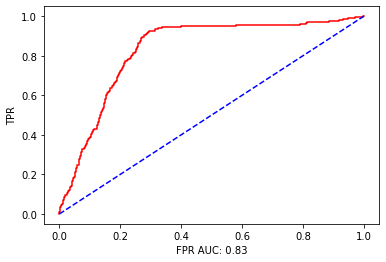

In [313]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 2) Decision tree

confusion_matrix 
 [[875 132]
 [132 500]]
cohen_kappa_score 0.6600568174676003
accuracy 0.8389261744966443
recall 0.7911392405063291
auc_score 0.8300284087338001
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1007
           1       0.79      0.79      0.79       632

    accuracy                           0.84      1639
   macro avg       0.83      0.83      0.83      1639
weighted avg       0.84      0.84      0.84      1639



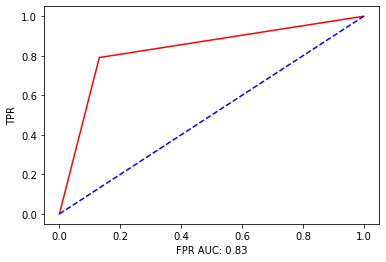

In [314]:
lr=DecisionTreeClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 3) Naive_bayes

confusion_matrix 
 [[730 277]
 [ 58 574]]
cohen_kappa_score 0.5947779033235348
accuracy 0.7956070774862721
recall 0.9082278481012658
auc_score 0.8165766847259059
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.72      0.81      1007
           1       0.67      0.91      0.77       632

    accuracy                           0.80      1639
   macro avg       0.80      0.82      0.79      1639
weighted avg       0.83      0.80      0.80      1639



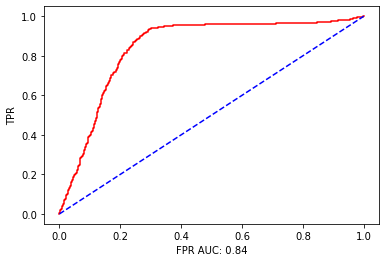

In [315]:
lr=GaussianNB()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 4) Knn

confusion_matrix 
 [[771 236]
 [185 447]]
cohen_kappa_score 0.46591840541559304
accuracy 0.7431360585723001
recall 0.7072784810126582
auc_score 0.7364594986989805
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1007
           1       0.65      0.71      0.68       632

    accuracy                           0.74      1639
   macro avg       0.73      0.74      0.73      1639
weighted avg       0.75      0.74      0.74      1639



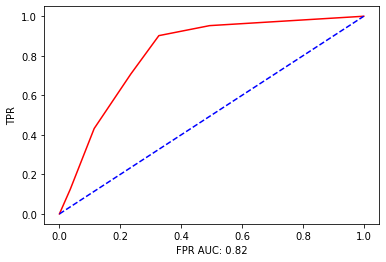

In [316]:
lr=KNeighborsClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 5) Random forest

confusion_matrix 
 [[867 140]
 [ 67 565]]
cohen_kappa_score 0.7390655295283963
accuracy 0.8737034777303234
recall 0.8939873417721519
auc_score 0.8774802647291743
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1007
           1       0.80      0.89      0.85       632

    accuracy                           0.87      1639
   macro avg       0.86      0.88      0.87      1639
weighted avg       0.88      0.87      0.87      1639



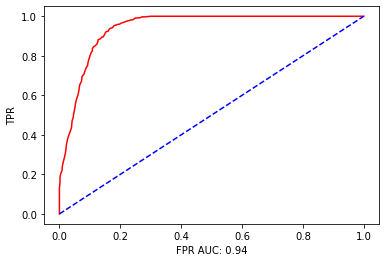

In [317]:
lr=RandomForestClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 6) Adaboost

confusion_matrix 
 [[848 159]
 [125 507]]
cohen_kappa_score 0.637930363924026
accuracy 0.8267236119585113
recall 0.8022151898734177
auc_score 0.8221602265156562
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1007
           1       0.76      0.80      0.78       632

    accuracy                           0.83      1639
   macro avg       0.82      0.82      0.82      1639
weighted avg       0.83      0.83      0.83      1639



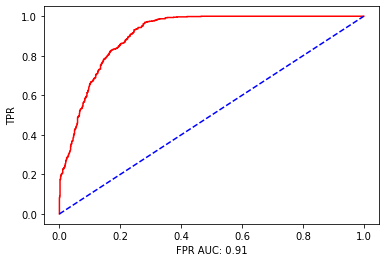

In [318]:
lr=AdaBoostClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])

### 7) Catboost

Learning rate set to 0.022995
0:	learn: 0.6604980	total: 164ms	remaining: 2m 43s
1:	learn: 0.6282995	total: 173ms	remaining: 1m 26s
2:	learn: 0.5999556	total: 179ms	remaining: 59.5s
3:	learn: 0.5748954	total: 186ms	remaining: 46.3s
4:	learn: 0.5514166	total: 195ms	remaining: 38.9s
5:	learn: 0.5305711	total: 206ms	remaining: 34.1s
6:	learn: 0.5156447	total: 220ms	remaining: 31.2s
7:	learn: 0.4965900	total: 231ms	remaining: 28.6s
8:	learn: 0.4784035	total: 243ms	remaining: 26.7s
9:	learn: 0.4643529	total: 254ms	remaining: 25.2s
10:	learn: 0.4505461	total: 267ms	remaining: 24s
11:	learn: 0.4406885	total: 281ms	remaining: 23.1s
12:	learn: 0.4283785	total: 295ms	remaining: 22.4s
13:	learn: 0.4182525	total: 307ms	remaining: 21.6s
14:	learn: 0.4092018	total: 319ms	remaining: 20.9s
15:	learn: 0.3999884	total: 330ms	remaining: 20.3s
16:	learn: 0.3931140	total: 342ms	remaining: 19.8s
17:	learn: 0.3853721	total: 358ms	remaining: 19.5s
18:	learn: 0.3785505	total: 374ms	remaining: 19.3s
19:	learn: 

161:	learn: 0.2467182	total: 2.35s	remaining: 12.2s
162:	learn: 0.2464321	total: 2.36s	remaining: 12.1s
163:	learn: 0.2462570	total: 2.38s	remaining: 12.1s
164:	learn: 0.2459878	total: 2.39s	remaining: 12.1s
165:	learn: 0.2458056	total: 2.4s	remaining: 12.1s
166:	learn: 0.2454618	total: 2.41s	remaining: 12s
167:	learn: 0.2452177	total: 2.42s	remaining: 12s
168:	learn: 0.2450215	total: 2.43s	remaining: 12s
169:	learn: 0.2448163	total: 2.44s	remaining: 11.9s
170:	learn: 0.2446318	total: 2.46s	remaining: 11.9s
171:	learn: 0.2443747	total: 2.47s	remaining: 11.9s
172:	learn: 0.2441473	total: 2.48s	remaining: 11.9s
173:	learn: 0.2438295	total: 2.5s	remaining: 11.8s
174:	learn: 0.2434992	total: 2.51s	remaining: 11.8s
175:	learn: 0.2432812	total: 2.52s	remaining: 11.8s
176:	learn: 0.2430154	total: 2.52s	remaining: 11.7s
177:	learn: 0.2427204	total: 2.53s	remaining: 11.7s
178:	learn: 0.2425964	total: 2.55s	remaining: 11.7s
179:	learn: 0.2423887	total: 2.56s	remaining: 11.7s
180:	learn: 0.241979

321:	learn: 0.2144076	total: 4.3s	remaining: 9.05s
322:	learn: 0.2142274	total: 4.31s	remaining: 9.04s
323:	learn: 0.2140321	total: 4.33s	remaining: 9.03s
324:	learn: 0.2138778	total: 4.34s	remaining: 9.02s
325:	learn: 0.2137515	total: 4.36s	remaining: 9s
326:	learn: 0.2135758	total: 4.37s	remaining: 8.99s
327:	learn: 0.2133884	total: 4.38s	remaining: 8.98s
328:	learn: 0.2132249	total: 4.4s	remaining: 8.97s
329:	learn: 0.2130626	total: 4.41s	remaining: 8.96s
330:	learn: 0.2129664	total: 4.42s	remaining: 8.94s
331:	learn: 0.2128198	total: 4.43s	remaining: 8.92s
332:	learn: 0.2126526	total: 4.45s	remaining: 8.91s
333:	learn: 0.2124285	total: 4.46s	remaining: 8.9s
334:	learn: 0.2123092	total: 4.47s	remaining: 8.88s
335:	learn: 0.2121065	total: 4.49s	remaining: 8.87s
336:	learn: 0.2117925	total: 4.5s	remaining: 8.86s
337:	learn: 0.2116114	total: 4.51s	remaining: 8.84s
338:	learn: 0.2114138	total: 4.53s	remaining: 8.83s
339:	learn: 0.2112719	total: 4.54s	remaining: 8.82s
340:	learn: 0.21112

480:	learn: 0.1891378	total: 6.24s	remaining: 6.73s
481:	learn: 0.1889311	total: 6.25s	remaining: 6.72s
482:	learn: 0.1887875	total: 6.27s	remaining: 6.71s
483:	learn: 0.1886604	total: 6.28s	remaining: 6.69s
484:	learn: 0.1885698	total: 6.29s	remaining: 6.68s
485:	learn: 0.1884223	total: 6.3s	remaining: 6.66s
486:	learn: 0.1881861	total: 6.31s	remaining: 6.65s
487:	learn: 0.1880684	total: 6.33s	remaining: 6.64s
488:	learn: 0.1879094	total: 6.34s	remaining: 6.62s
489:	learn: 0.1877936	total: 6.35s	remaining: 6.61s
490:	learn: 0.1876661	total: 6.37s	remaining: 6.6s
491:	learn: 0.1875089	total: 6.38s	remaining: 6.59s
492:	learn: 0.1873560	total: 6.4s	remaining: 6.58s
493:	learn: 0.1872077	total: 6.42s	remaining: 6.57s
494:	learn: 0.1869661	total: 6.43s	remaining: 6.56s
495:	learn: 0.1869395	total: 6.44s	remaining: 6.55s
496:	learn: 0.1868285	total: 6.46s	remaining: 6.54s
497:	learn: 0.1866844	total: 6.47s	remaining: 6.52s
498:	learn: 0.1864742	total: 6.48s	remaining: 6.51s
499:	learn: 0.1

639:	learn: 0.1659415	total: 8.32s	remaining: 4.68s
640:	learn: 0.1658931	total: 8.34s	remaining: 4.67s
641:	learn: 0.1657481	total: 8.35s	remaining: 4.66s
642:	learn: 0.1656594	total: 8.37s	remaining: 4.64s
643:	learn: 0.1655060	total: 8.37s	remaining: 4.63s
644:	learn: 0.1653146	total: 8.38s	remaining: 4.62s
645:	learn: 0.1651858	total: 8.4s	remaining: 4.6s
646:	learn: 0.1650428	total: 8.42s	remaining: 4.59s
647:	learn: 0.1649074	total: 8.43s	remaining: 4.58s
648:	learn: 0.1647462	total: 8.45s	remaining: 4.57s
649:	learn: 0.1645017	total: 8.47s	remaining: 4.56s
650:	learn: 0.1643472	total: 8.48s	remaining: 4.54s
651:	learn: 0.1641798	total: 8.49s	remaining: 4.53s
652:	learn: 0.1640399	total: 8.5s	remaining: 4.52s
653:	learn: 0.1639304	total: 8.52s	remaining: 4.51s
654:	learn: 0.1637678	total: 8.53s	remaining: 4.49s
655:	learn: 0.1637326	total: 8.54s	remaining: 4.48s
656:	learn: 0.1635995	total: 8.55s	remaining: 4.46s
657:	learn: 0.1635105	total: 8.56s	remaining: 4.45s
658:	learn: 0.1

800:	learn: 0.1462001	total: 10.5s	remaining: 2.6s
801:	learn: 0.1461031	total: 10.5s	remaining: 2.59s
802:	learn: 0.1460529	total: 10.5s	remaining: 2.58s
803:	learn: 0.1458877	total: 10.5s	remaining: 2.57s
804:	learn: 0.1457579	total: 10.5s	remaining: 2.55s
805:	learn: 0.1456369	total: 10.6s	remaining: 2.54s
806:	learn: 0.1455123	total: 10.6s	remaining: 2.53s
807:	learn: 0.1453264	total: 10.6s	remaining: 2.52s
808:	learn: 0.1452430	total: 10.6s	remaining: 2.5s
809:	learn: 0.1451605	total: 10.6s	remaining: 2.49s
810:	learn: 0.1450489	total: 10.6s	remaining: 2.48s
811:	learn: 0.1449624	total: 10.7s	remaining: 2.47s
812:	learn: 0.1448136	total: 10.7s	remaining: 2.45s
813:	learn: 0.1447696	total: 10.7s	remaining: 2.44s
814:	learn: 0.1447058	total: 10.7s	remaining: 2.43s
815:	learn: 0.1445500	total: 10.7s	remaining: 2.42s
816:	learn: 0.1443954	total: 10.7s	remaining: 2.4s
817:	learn: 0.1443365	total: 10.8s	remaining: 2.39s
818:	learn: 0.1442272	total: 10.8s	remaining: 2.38s
819:	learn: 0.1

960:	learn: 0.1303642	total: 12.6s	remaining: 512ms
961:	learn: 0.1302857	total: 12.6s	remaining: 499ms
962:	learn: 0.1302031	total: 12.7s	remaining: 486ms
963:	learn: 0.1300551	total: 12.7s	remaining: 473ms
964:	learn: 0.1299723	total: 12.7s	remaining: 460ms
965:	learn: 0.1298475	total: 12.7s	remaining: 447ms
966:	learn: 0.1297570	total: 12.7s	remaining: 434ms
967:	learn: 0.1296739	total: 12.7s	remaining: 421ms
968:	learn: 0.1295857	total: 12.8s	remaining: 408ms
969:	learn: 0.1294352	total: 12.8s	remaining: 395ms
970:	learn: 0.1293616	total: 12.8s	remaining: 382ms
971:	learn: 0.1292574	total: 12.8s	remaining: 369ms
972:	learn: 0.1291205	total: 12.8s	remaining: 356ms
973:	learn: 0.1290283	total: 12.8s	remaining: 343ms
974:	learn: 0.1289020	total: 12.8s	remaining: 329ms
975:	learn: 0.1287859	total: 12.9s	remaining: 316ms
976:	learn: 0.1286587	total: 12.9s	remaining: 303ms
977:	learn: 0.1285088	total: 12.9s	remaining: 290ms
978:	learn: 0.1283764	total: 12.9s	remaining: 277ms
979:	learn: 

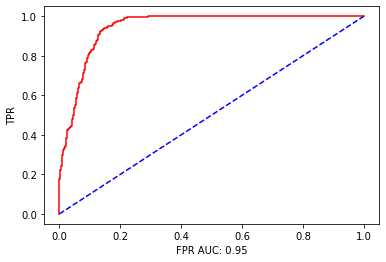

In [319]:
from catboost import CatBoostClassifier
lr=CatBoostClassifier()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
evaluation(ytest,pred)
roc(ytest,model.predict_proba(xtest)[:,1])